# Initial Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
tf.random.set_seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 7.43 s, sys: 1.4 s, total: 8.82 s
Wall time: 13.6 s


# Import Data

In [3]:
Atrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-train.csv")
Btrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case/SubTask-B-train.csv")
Ctrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case/SubTask-C-train.csv")

Aval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-(index,tweet)val.csv')
Aval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A(index,label)val.csv')

Bval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,tweet)val.csv')
Bval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,label)val.csv')

Cval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-C(index,tweet)val.csv')
Cval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-C(index,label)val.csv')

Atest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-(index,tweet)test.csv')
Btest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,tweet)test.csv')
Ctest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-C(index,tweet)test.csv')

Atest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A(index,label)test.csv')
Btest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,label)test.csv')
Ctest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-C(index,label)test.csv')


In [4]:
print("Total number of training samples train set - task 1:", len(Atrain))
print("Total number of training samples dev set - task 1:", len(Aval_tweet))
print("Total number of training samples test set - task 1:", len(Atest_tweet))


Total number of training samples train set - task 1: 7284
Total number of training samples dev set - task 1: 1561
Total number of training samples test set - task 1: 1562


In [5]:
print("Total number of training samples train set - task 2:", len(Btrain))
print("Total number of training samples dev set - task 2:", len(Bval_tweet))
print("Total number of training samples test set - task 2:", len(Btest_tweet))

Total number of training samples train set - task 2: 699
Total number of training samples dev set - task 2: 150
Total number of training samples test set - task 2: 150


In [6]:
# print("Total number of training samples train set - task 3:", len(Ctrain))
# print("Total number of training samples dev set - task 3:", len(Cval_tweet))
# print("Total number of training samples test set - task 3:", len(Ctest_tweet))

In [7]:
Btrain.head()

,index,tweet,label
0,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,1
1,10014,#ClimateCrisis #ClimateAction #GlobalWarmin...,1
2,10021,Major climate denier Pat Michaels has died. D...,1
3,10028,#Greenwashing #ExtinctionRebellion #ClimateAct...,1
4,10034,#ExtinctionRebellion #ClimateCrisis #Clim...,1


In [8]:
Btrain.tail()

,index,tweet,label
694,20262,#Renewables #Greenwashing #ClimateStrike ...,1
695,20293,#FridaysForFuture #ClimateChange #Renewables ...,1
696,20346,#FridaysForFuture #ClimateChange #Renewables #...,1
697,20366,#Greenwashing #Renewables #ClimateStrike #Ext...,1
698,20367,#ClimateCrisis #ClimateAction #GlobalWarming ...,1


In [9]:
Btest_tweet.head()

,index,tweet
0,10000,british govt/msm sheer hypocrisy!!! ‘Out of re...
1,10004,This #FridaysForFuture on Zoom we will get boo...
2,10046,Greenpeace: RT @mnyomb1: The #IPCC report is v...
3,10072,@magdaghonem The massacre of trees in Egypt.\n...
4,10102,#FridaysForFuture Week 92\n\nThe🌎is changing t...


In [10]:
Bval_tweet.head(5)

,index,tweet
0,10134,#ClimateChange #Greenwashing #Renewables #Cli...
1,10165,This can be the result when a workplace does n...
2,10209,#dreadlocks is trending in Germany because #fr...
3,10356,#FridaysForFuture #ClimateChange #Renewables #...
4,10423,@Shevans9104 @paulmurphy_TD You could always g...


In [11]:
Bval_label.head(5)

,index,label
0,10134,1
1,10165,2
2,10209,2
3,10356,1
4,10423,1


In [12]:
# Get the unique identifiers from both dataframes
identifiers_tweet = set(Bval_tweet['index'])
identifiers_label = set(Bval_label['index'])

# Find common identifiers using intersection
common_identifiers = identifiers_tweet.intersection(identifiers_label)

# Print common identifiers
print("Common Identifiers:", common_identifiers)

# Check if there are any common identifiers
if common_identifiers:
    print("There are common identifiers.")
else:
    print("No common identifiers found.")


Common Identifiers: {12291, 10761, 11785, 15374, 10766, 10768, 11281, 13330, 10771, 16404, 13867, 16436, 12856, 12356, 10823, 12361, 16464, 13908, 13914, 13409, 10850, 19553, 19045, 11370, 14959, 10866, 16499, 10356, 17524, 17527, 18040, 14969, 14458, 10878, 14466, 15504, 10901, 19098, 16553, 13997, 15024, 19632, 14515, 10423, 12473, 16059, 16064, 14020, 14532, 19656, 19146, 19659, 18637, 13008, 15569, 18129, 16085, 14038, 11479, 15576, 15067, 17628, 19676, 16094, 16096, 12002, 17634, 18151, 18663, 12009, 12522, 18672, 13044, 16120, 15097, 15611, 13563, 11520, 12547, 12036, 12040, 15118, 16142, 16143, 15638, 11546, 13603, 12068, 20261, 10536, 17704, 11052, 11565, 11573, 14136, 15690, 12111, 12113, 14681, 13147, 12636, 20318, 14175, 14182, 15718, 18278, 10601, 11114, 16234, 20340, 15738, 19844, 16775, 18827, 12687, 12691, 19349, 10134, 11164, 16290, 14243, 16296, 20392, 11182, 14257, 20402, 18867, 10165, 18358, 14265, 17849, 17861, 16841, 13777, 11218, 11731, 10715, 14303, 10209, 11234,

In [13]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Bval = pd.concat([Bval_tweet.set_index('index'), Bval_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Bval = Bval.dropna()

# Reset the index to make 'identifier' a regular column again
Bval.reset_index(inplace=True)

# Print the resulting DataFrame
Bval

,index,tweet,label
0,10134,#ClimateChange #Greenwashing #Renewables #Cli...,1
1,10165,This can be the result when a workplace does n...,2
2,10209,#dreadlocks is trending in Germany because #fr...,2
3,10356,#FridaysForFuture #ClimateChange #Renewables #...,1
4,10423,@Shevans9104 @paulmurphy_TD You could always g...,1
...,...,...,...
145,20261,#Renewables #Greenwashing #ClimateStrike #Ext...,1
146,20318,https://t.co/QruGYeQgcp https://t.co/DOk69KYYu...,2
147,20340,#ClimateCrisis #GlobalWarming #ClimateChange #...,1
148,20392,#Greenwashing #Renewables #ClimateStrike #Exti...,1


In [14]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Btest = pd.concat([Btest_tweet.set_index('index'), Btest_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Btest = Btest.dropna()

# Reset the index to make 'identifier' a regular column again
Btest.reset_index(inplace=True)

# Print the resulting DataFrame
Btest

,index,tweet,label
0,10000,british govt/msm sheer hypocrisy!!! ‘Out of re...,2
1,10004,This #FridaysForFuture on Zoom we will get boo...,2
2,10046,Greenpeace: RT @mnyomb1: The #IPCC report is v...,2
3,10072,@magdaghonem The massacre of trees in Egypt.\n...,2
4,10102,#FridaysForFuture Week 92\n\nThe🌎is changing t...,3
...,...,...,...
145,19860,#ClimateStrike #ExtinctionRebellion #ClimateAc...,1
146,19880,#ClimateStrike #ExtinctionRebellion #ClimateA...,1
147,19973,#FridaysForFuture #ClimateChange #Renewables #...,1
148,20363,#ExtinctionRebellion #ClimateCrisis #Climate...,1


# Data Set Analysis

In [15]:
print(Btrain['label'].value_counts())
print(Bval_label['label'].value_counts())

1    563
2    105
3     31
Name: label, dtype: int64
1    120
2     23
3      7
Name: label, dtype: int64


In [16]:
train_corpus = Btrain["tweet"].sum()
test_corpus = Btest["tweet"].sum()
#test_corpus

In [17]:
import re

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 2691
Number of unique words in test data: 825
Number of out-of-vocabulary (OOV) words: 423


In [18]:
filtered_train = Btrain[lambda x: x["tweet"].str.contains("[^A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,index,tweet,label
694,20262,#Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture #ClimateChange \n\nYou've been fooled by Greta Thunberg:,1
695,20293,#FridaysForFuture #ClimateChange #Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming \n\nYou've been fooled by Greta Thunberg:,1
696,20346,#FridaysForFuture #ClimateChange #Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming \n\nYou've been fooled by Greta Thunberg:,1
697,20366,#Greenwashing #Renewables #ClimateStrike #ExtinctionRebellion #ClimateAction #ClimateCrisis #GlobalWarming #FridaysForFuture #ClimateChange \n\nYou've been fooled by Greta Thunberg:,1
698,20367,#ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture #ClimateChange #Renewables #Greenwashing #ExtinctionRebellion #ClimateStrike \n\nYou've been fooled by Greta Thunberg:,1


In [19]:
filtered_train.shape

(699, 3)

## Check For Codemixed

In [20]:
filtered_train = Btrain[Btrain['tweet'].str.contains('[A-Za-z]+') & Btrain['tweet'].str.contains('[^A-Za-z]+')]
with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,index,tweet,label
694,20262,#Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture #ClimateChange \n\nYou've been fooled by Greta Thunberg:,1
695,20293,#FridaysForFuture #ClimateChange #Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming \n\nYou've been fooled by Greta Thunberg:,1
696,20346,#FridaysForFuture #ClimateChange #Renewables #Greenwashing #ClimateStrike #ExtinctionRebellion #ClimateCrisis #ClimateAction #GlobalWarming \n\nYou've been fooled by Greta Thunberg:,1
697,20366,#Greenwashing #Renewables #ClimateStrike #ExtinctionRebellion #ClimateAction #ClimateCrisis #GlobalWarming #FridaysForFuture #ClimateChange \n\nYou've been fooled by Greta Thunberg:,1
698,20367,#ClimateCrisis #ClimateAction #GlobalWarming #FridaysForFuture #ClimateChange #Renewables #Greenwashing #ExtinctionRebellion #ClimateStrike \n\nYou've been fooled by Greta Thunberg:,1


In [21]:
filtered_train.shape

(699, 3)

In [22]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and count similar URLs
tweets = Btrain['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet
all_urls = [url_pattern.findall(tweet) for tweet in tweets]

# Flatten the list of lists into a single list
all_urls_flat = [url for sublist in all_urls for url in sublist]

# Create a DataFrame to count the occurrences of each URL
url_df = pd.DataFrame(all_urls_flat, columns=['URL'])
url_frequency = url_df['URL'].value_counts()

# Display the count of occurrences for each unique URL
print("URL Frequency:")
print(url_frequency)


URL Frequency:
https://t.co/16v1D8AO1r    2
https://t.co/6UjY9djsCv    1
https://t.co/fs4vvNjobH    1
https://t.co/u2GhFi1fTI    1
https://t.co/TJ4wceonno    1
                          ..
https://t.co/TlD3upK4KQ    1
https://t.co/dgQvZR6ygD    1
https://t.co/xPIdUste3F    1
https://t.co/u4R7k7ycfQ    1
https://t.co/TCihqcLNn9    1
Name: URL, Length: 108, dtype: int64


In [23]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and compare URLs
train_tweets = Btrain['tweet']
test_tweets = Btest['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet in train dataset
train_urls = [url_pattern.findall(tweet) for tweet in train_tweets]
train_urls_flat = [url for sublist in train_urls for url in sublist]

# Extract URLs from each tweet in test dataset
test_urls = [url_pattern.findall(tweet) for tweet in test_tweets]
test_urls_flat = [url for sublist in test_urls for url in sublist]

# Find common URLs between train and test datasets
common_urls = set(train_urls_flat).intersection(test_urls_flat)

# Display common URLs
# print("Common URLs:")
# print(common_urls)

num_common_urls = len(common_urls)
print(f"Number of common URLs: {num_common_urls}")


Number of common URLs: 1


# Preprocessing

In [24]:
# import re
# from collections import Counter

# # Assuming Btrain['tweet'] is a pandas Series containing the tweets
# all_tokens = []

# for tweet in Btrain['tweet']:
#     # Find all tokens starting with a hash(#) or at the rate(@) and followed by some number of alphabets or numbers
#     matches = re.findall(r'[@#][_a-zA-Z0-9]+', tweet)

#     # Extend the list of all tokens with the matches for each tweet
#     all_tokens.extend(matches)

# # Count the occurrences of each token
# token_counts = Counter(all_tokens)

# # Display tokens sorted by count
# sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# for token, count in sorted_tokens:
#     print(f"{token}: {count}")


In [25]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u00C0-\u017F"          #latin
        u"\u2000-\u206F"          #generalPunctuations
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030" "]+", re.UNICODE)

    text = text.lower()
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)
    # emoji removal
    text = emoji.sub(r' ',text)
    # text = re.sub(r'[@#][_a-zA-Z0-9]+', ' ', text)
    text = text.replace('\n', ' ')
    text = text.replace('—', ' ')
    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*=৳।!/_:.()-[]{};'"“\’,<>?@#$%^&*~‘—॥”‰￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else :
            no_punct = no_punct + " "

    no_punct = re.sub(r'\s+', ' ', no_punct)  #replace multiple space with single space

    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [26]:
Btrain['cleanText'] = Btrain.tweet.apply(lambda x: preprocessing(str(x)))
Bval['cleanText'] = Bval.tweet.apply(lambda x: preprocessing(str(x)))
Btest['cleanText'] = Btest.tweet.apply(lambda x: preprocessing(str(x)))

## Stop Words Removal

In [27]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [28]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Btrain["cleanText"] = Btrain["cleanText"].apply(lambda text: remove_stopwords(text))
Bval["cleanText"] = Bval["cleanText"].apply(lambda text: remove_stopwords(text))
Btest["cleanText"] = Btest["cleanText"].apply(lambda text: remove_stopwords(text))

In [29]:
Btrain.head(10)

,index,tweet,label,cleanText
0,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarming frid...
1,10014,#ClimateCrisis #ClimateAction #GlobalWarmin...,1,climatecrisis climateaction globalwarming frid...
2,10021,Major climate denier Pat Michaels has died. D...,1,major climate denier pat michaels died really ...
3,10028,#Greenwashing #ExtinctionRebellion #ClimateAct...,1,greenwashing extinctionrebellion climateaction...
4,10034,#ExtinctionRebellion #ClimateCrisis #Clim...,1,extinctionrebellion climatecrisis climateactio...
5,10036,Gas and nuclear are not green! \nThe new #EUTa...,2,gas nuclear green new eutaxonomy safeguarding ...
6,10039,ONLY ONE DAY UNTIL THE #ClimateStrike!!! 🔥\n\n...,2,one day climatestrike one year ago cop26 left ...
7,10040,It is time for all U.K. citizens to call out t...,2,time u k citizens call hypocrisy conservative ...
8,10068,Week 106. Pakistan is one of the countries lea...,2,week 106 pakistan one countries least responsi...
9,10085,So now the Palm Oil Industry is trying to rebr...,2,palm oil industry trying rebrand deforestation...


In [30]:
Bval.head(10)

,index,tweet,label,cleanText
0,10134,#ClimateChange #Greenwashing #Renewables #Cli...,1,climatechange greenwashing renewables climates...
1,10165,This can be the result when a workplace does n...,2,result workplace practice austismacceptance gr...
2,10209,#dreadlocks is trending in Germany because #fr...,2,dreadlocks trending germany fridaysforfuture w...
3,10356,#FridaysForFuture #ClimateChange #Renewables #...,1,fridaysforfuture climatechange renewables gree...
4,10423,@Shevans9104 @paulmurphy_TD You could always g...,1,shevans9104 paulmurphy td could always go outs...
5,10536,#FridaysForFuture #ClimateChange #Greenwashing...,1,fridaysforfuture climatechange greenwashing re...
6,10601,#ClimateCrisis #ClimateAction #GlobalWarmin...,1,climatecrisis climateaction globalwarming frid...
7,10715,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarming frid...
8,10743,SaBEEne in her natural gracility\nbelieves she...,1,sabeene natural gracility believes model civil...
9,10761,we have to wage war against fossil fuel compan...,2,wage war fossil fuel companies earning destruc...


## Lemmatization

In [31]:
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
# def lemmatize_words(text):
#     pos_tagged_text = nltk.pos_tag(text.split())
#     return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


# Btrain["cleanText"] = Btrain["cleanText"].apply(lambda text: lemmatize_words(text))
# Bval["cleanText"] = Bval["cleanText"].apply(lambda text: lemmatize_words(text))
# Btest["cleanText"] = Btest["cleanText"].apply(lambda text: lemmatize_words(text))

In [32]:
!pip install spacy
!python -m spacy download en_core_web_sm

2024-01-17 13:47:21.344753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 13:47:21.344820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 13:47:21.346181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 13:47:22.646684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization using spaCy
def lemmatize_with_spacy(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmatized tokens and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

# Apply the lemmatization function to your DataFrame columns
Btrain["cleanText"] = Btrain["cleanText"].apply(lemmatize_with_spacy)
Bval["cleanText"] = Bval["cleanText"].apply(lemmatize_with_spacy)
Btest["cleanText"] = Btest["cleanText"].apply(lemmatize_with_spacy)

In [34]:
Btrain.head(10)

,index,tweet,label,cleanText
0,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarme friday...
1,10014,#ClimateCrisis #ClimateAction #GlobalWarmin...,1,climatecrisis climateaction globalwarme friday...
2,10021,Major climate denier Pat Michaels has died. D...,1,major climate denier pat michael die really kn...
3,10028,#Greenwashing #ExtinctionRebellion #ClimateAct...,1,greenwashe extinctionrebellion climateaction c...
4,10034,#ExtinctionRebellion #ClimateCrisis #Clim...,1,extinctionrebellion climatecrisis climateactio...
5,10036,Gas and nuclear are not green! \nThe new #EUTa...,2,gas nuclear green new eutaxonomy safeguard fut...
6,10039,ONLY ONE DAY UNTIL THE #ClimateStrike!!! 🔥\n\n...,2,one day climatestrike one year ago cop26 leave...
7,10040,It is time for all U.K. citizens to call out t...,2,time u k citizen call hypocrisy conservative g...
8,10068,Week 106. Pakistan is one of the countries lea...,2,week 106 pakistan one country least responsibl...
9,10085,So now the Palm Oil Industry is trying to rebr...,2,palm oil industry try rebrand deforestation re...


In [35]:
Bval.head(10)

,index,tweet,label,cleanText
0,10134,#ClimateChange #Greenwashing #Renewables #Cli...,1,climatechange greenwashing renewable climatest...
1,10165,This can be the result when a workplace does n...,2,result workplace practice austismacceptance gr...
2,10209,#dreadlocks is trending in Germany because #fr...,2,dreadlock trend germany fridaysforfuture want ...
3,10356,#FridaysForFuture #ClimateChange #Renewables #...,1,fridaysforfuture climatechange renewable green...
4,10423,@Shevans9104 @paulmurphy_TD You could always g...,1,shevans9104 paulmurphy td could always go outs...
5,10536,#FridaysForFuture #ClimateChange #Greenwashing...,1,fridaysforfuture climatechange greenwashing re...
6,10601,#ClimateCrisis #ClimateAction #GlobalWarmin...,1,climatecrisis climateaction globalwarme friday...
7,10715,#ClimateCrisis #ClimateAction #GlobalWarming ...,1,climatecrisis climateaction globalwarme friday...
8,10743,SaBEEne in her natural gracility\nbelieves she...,1,sabeene natural gracility believe model civili...
9,10761,we have to wage war against fossil fuel compan...,2,wage war fossil fuel company earn destruction ...


# Remove Duplicate Samples

In [36]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming Btrain['tweet'] and Btrain['label'] are your tweet and label columns
class_1_tweets = Btrain[Btrain['label'] == 0]['cleanText']
class_2_tweets = Btrain[Btrain['label'] == 1]['cleanText']

# Tokenize the tweets
class_1_tokens = [token.lower() for tweet in class_1_tweets for token in word_tokenize(tweet)]
class_2_tokens = [token.lower() for tweet in class_2_tweets for token in word_tokenize(tweet)]


# Count the frequency of each token
counter_class_1 = Counter(class_1_tokens)
counter_class_2 = Counter(class_2_tokens)
print(counter_class_1.most_common(20))
print()
print(counter_class_2.most_common(20))
# Find the top 100 common tokens
common_tokens = set(counter_class_1.most_common(50)).intersection(counter_class_2.most_common(50))

# Print common tokens and their frequencies
for token, freq in common_tokens:
    print(f"Token: {token}, Class 1 Frequency: {counter_class_1[token]}, Class 2 Frequency: {counter_class_2[token]}")



[]

[('fridaysforfuture', 564), ('climatechange', 514), ('extinctionrebellion', 508), ('climateaction', 502), ('greta', 502), ('climatestrike', 493), ('thunberg', 493), ('climatecrisis', 489), ('fool', 488), ('renewable', 486), ('globalwarme', 341), ('greenwashing', 283), ('greenwashe', 224), ('globalwarming', 169), ('lie', 41), ('we', 41), ('keep', 21), ('every', 20), ('green', 20), ('many', 19)]


In [37]:
# words_to_remove = [, 'climate', 'climBtestrike', 'climatecrisis', 'strike',
#                    'peoplenotprofit', 'climBtestrike', 'climateaction', 'climatecrisis',
#                    'extinctionrebellion', 'climatechange', 'thunberg', 'greta',
#                    'gretathunberg', 'climateemergency', 'climatejustice',
#                    'climateactionnow', 'renewable', 'crisis', 'change', 'action']

# words_to_remove = ['fridaysforfuture']

# def remove_specific_words(text):
#     for word in words_to_remove:
#         text = text.replace(word, '')
#     return text

# Btrain['cleanText'] = Btrain['cleanText'].apply(remove_specific_words)

# Bval['cleanText'] = Bval['cleanText'].apply(remove_specific_words)

# Btest['cleanText'] = Btest['cleanText'].apply(remove_specific_words)


In [38]:
# Text to search
search_text = "fool greta thunberg"

# Initialize a dictionary to store label-wise frequencies
label_frequencies = {}

# Iterate over each row in Btrain
for index, row in Btrain.iterrows():
    label = row['label']
    tweet_text = row['cleanText']

    # Check if the search text is present in the tweet text
    if search_text in tweet_text:
        # Increment the count for the label
        label_frequencies[label] = label_frequencies.get(label, 0) + 1

# Display the label-wise frequencies
for label, frequency in label_frequencies.items():
    print(f"Label {label}: {frequency} occurrences")


Label 1: 488 occurrences


In [39]:
# for text in Btrain[(Btrain['cleanText'].str.contains('greta thunberg')) & (Btrain['label'] == 3)]['cleanText']:
#     print(text)

In [40]:
import pandas as pd

# Assuming Atrain['cleanText'] is the column containing the text

# Keep just one row containing that text
one_row = Btrain[Btrain['cleanText'].str.contains("fool greta thunberg")].head(1)


# Drop rows containing the specified text
Btrain = Btrain[~Btrain['cleanText'].str.contains("fool greta thunberg")]


# Concatenate the one_row with the original DataFrame
Btrain = pd.concat([Btrain, one_row], ignore_index=True)

In [41]:
# Assuming Btrain is your DataFrame
duplicate_rows = Btrain[Btrain.duplicated('cleanText', keep=False)]

# Display the duplicate rows
duplicate_rows.shape


(17, 4)

In [42]:
# Assuming Btrain is your DataFrame
Btrain.drop_duplicates(subset='cleanText', keep='first', inplace=True)

In [43]:
Btrain['label'].value_counts()

2    105
1     61
3     31
Name: label, dtype: int64

# Data Set Visualization

In [ ]:
Btrain_summary = Btrain.filter(['cleanText', 'label'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Btrain
Btrain_comments, Btrain_words, Btrain_u_words, Btrain_class_names = data_summary(Btrain_summary)



Class Name :  2
Number of tweets:105
Number of Words:2166
Number of Unique Words:1142
Most Frequent Words:

fridaysforfuture	107
climate	31
climatecrisis	29
government	22
stop	17
fuel	16
company	14
fossil	13
need	12
climatestrike	11

Class Name :  1
Number of tweets:61
Number of Words:1213
Number of Unique Words:738
Most Frequent Words:

fridaysforfuture	62
climate	18
greta	15
climatecrisis	13
climatechange	12
lie	11
we	11
climateaction	11
gretathunberg	11
get	7

Class Name :  3
Number of tweets:31
Number of Words:588
Number of Unique Words:407
Most Frequent Words:

fridaysforfuture	31
climate	15
climatecrisis	11
change	8
climatechange	6
people	6
earth	6
climateemergency	6
climateaction	6
global	5
Total Number of Unique Words:1824


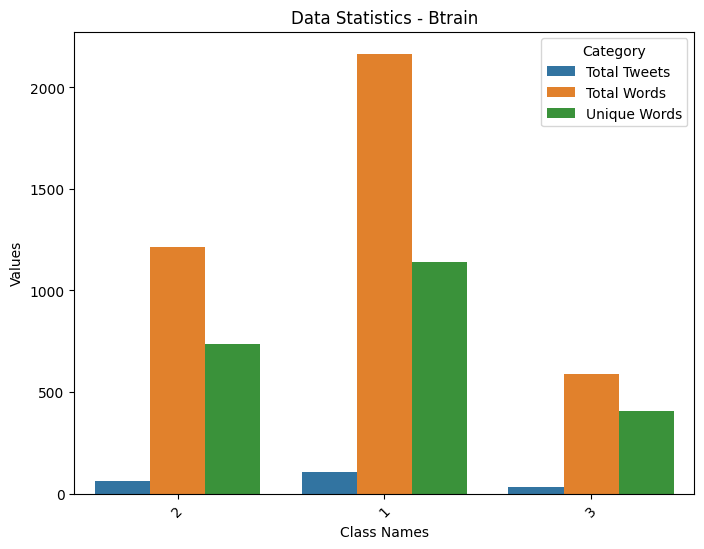

In [ ]:
Btrain_data_matrix = pd.DataFrame({
    'Total Tweets': Btrain_comments,
    'Total Words': Btrain_words,
    'Unique Words': Btrain_u_words,
    'Class Names': Btrain_class_names
})

Btrain_df = pd.melt(Btrain_data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=Btrain_df, x='Class Names', y='Values', hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics - Btrain')

ax.xaxis.set_ticklabels(Btrain_class_names, rotation=45);

plt.show()

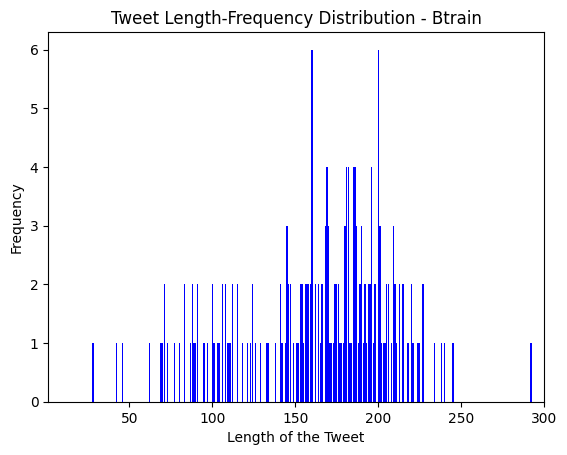

Maximum Length of a Tweet: 806
Minimum Length of a Tweet: 28
Average Length of a Tweet: 169.0


In [ ]:
Btrain['Tweet_length'] = Btrain.cleanText.apply(lambda x: len(x))
frequency = dict()

for i in Btrain.Tweet_length:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 300)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Btrain')
plt.show()

print(f"Maximum Length of a Tweet: {max(Btrain.Tweet_length)}")
print(f"Minimum Length of a Tweet: {min(Btrain.Tweet_length)}")
print(f"Average Length of a Tweet: {round(np.mean(Btrain.Tweet_length), 0)}")

In [ ]:
Btrain.loc[Btrain['Tweet_length'] > 256]['label'].value_counts()

2    3
Name: label, dtype: int64

In [ ]:

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Bval
Bval_comments, Bval_words, Bval_u_words, Bval_class_names = data_summary(Bval)



Class Name :  1
Number of tweets:120
Number of Words:1595
Number of Unique Words:261
Most Frequent Words:

fridaysforfuture	120
extinctionrebellion	105
climatechange	103
climateaction	101
climatecrisis	101
thunberg	100
climatestrike	99
fool	99
greta	99
renewable	97

Class Name :  2
Number of tweets:23
Number of Words:472
Number of Unique Words:330
Most Frequent Words:

fridaysforfuture	23
climate	14
climatestrike	6
fuel	5
government	5
fossil	4
industry	4
climatecrisis	4
gretathunberg	3
climateaction	3

Class Name :  3
Number of tweets:7
Number of Words:181
Number of Unique Words:154
Most Frequent Words:

fridaysforfuture	7
climate	4
scientist	3
fff	3
liar	3
say	2
make	2
°	2
c	2
change	2
Total Number of Unique Words:643


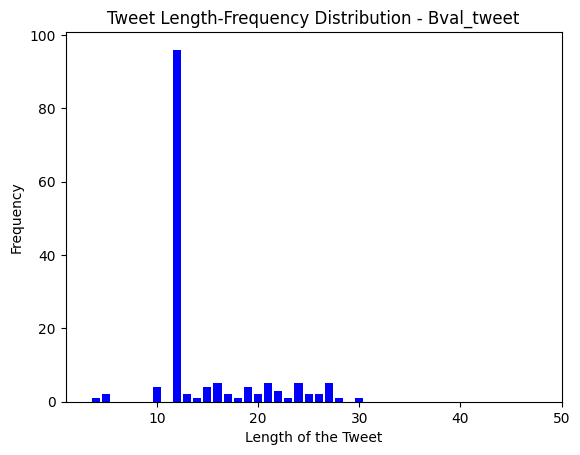

Maximum Length of a Tweet: 85
Minimum Length of a Tweet: 4
Average Length of a Tweet: 15.0


In [ ]:
# Assuming 'cleanText' contains the text in Bval_tweet
Bval['Tweet_length'] = Bval['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Bval['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 50)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Bval_tweet')
plt.show()

print(f"Maximum Length of a Tweet: {max(Bval['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Bval['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Bval['Tweet_length']), 0)}")


In [ ]:
Btest_summary = Btest.filter(['cleanText'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]

    # find word list
    word_list = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0) + 1

    # sort the dictionary of the word list
    ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)

    # Total Word per dataset
    words.append(len(word_list))
    # Unique words per dataset
    u_words.append(len(np.unique(word_list)))

    print("\nDataset Summary")
    print("Total Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Most Frequent Words:\n")
    for k, v in ordered[:10]:
        print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return words, u_words

# Call the function for Btest
Btest_words, Btest_u_words = data_summary(Btest_summary)



Dataset Summary
Total Number of Words:2203
Number of Unique Words:607
Most Frequent Words:

fridaysforfuture	151
climatecrisis	118
climatechange	112
extinctionrebellion	111
climateaction	111
greta	110
climatestrike	109
renewable	106
fool	106
thunberg	106
Total Number of Unique Words:607


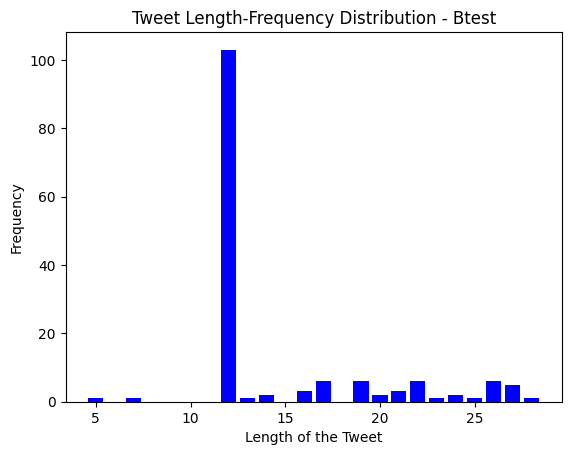

Maximum Length of a Tweet: 28
Minimum Length of a Tweet: 5
Average Length of a Tweet: 15.0


In [ ]:
# Assuming 'cleanText' contains the text in Btest
Btest['Tweet_length'] = Btest['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Btest['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Btest')
plt.show()

print(f"Maximum Length of a Tweet: {max(Btest['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Btest['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Btest['Tweet_length']), 0)}")


# Converting tolist()

In [44]:
X_train = Btrain['cleanText'].tolist()
y_train = Btrain['label'].tolist()
X_valid = Bval['cleanText'].tolist()
y_valid = Bval['label'].tolist()
X_test = Btest['cleanText'].tolist()
y_test = Btest['label'].tolist()

In [45]:
Bval['enc_label'] = Bval['label'] - 1
Btrain['enc_label'] = Btrain['label'] - 1
Btest['enc_label'] = Btest['label'] - 1
print(Bval['enc_label'].unique())
print(Btrain['enc_label'].unique())

[0 1 2]
[0 1 2]


In [46]:
y_train = [label - 1 for label in y_train]
y_valid = [label - 1 for label in y_valid]

In [47]:
y_test = [label - 1 for label in y_test]

In [48]:
Bval.shape

(150, 5)

# Compute Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# cls = np.unique(train_data['Label'])
# print(cls)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Btrain['label']),
                                        y = Btrain['label']
                                    )

weight = {i : class_weights[i] for i in range(3)}
weight

{0: 1.0765027322404372, 1: 0.6253968253968254, 2: 2.118279569892473}

# ML Models

## TF-IDF

In [ ]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

### Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid_rf = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': ['balanced', None]
# }

# # Create a RandomForestClassifier
# rf_classifier = RandomForestClassifier()

# # Create the GridSearchCV object
# grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
#                                scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search_rf.fit(X_train_tfidf, y_train)

# # Print the best parameters and the corresponding accuracy
# print("Best Parameters: ", grid_search_rf.best_params_)
# print("Best Accuracy: ", grid_search_rf.best_score_)

# # Get the best model
# best_rf_model = grid_search_rf.best_estimator_

# # Predict on the validation set
# y_pred_val = best_rf_model.predict(X_val_tfidf)

# # Evaluate the model
# accuracy_val = accuracy_score(y_val, y_pred_val)
# classification_report_val = classification_report(y_val, y_pred_val)

# print("Validation Accuracy: ", accuracy_val)
# print("Classification Report (Validation):\n", classification_report_val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

### RF Validation Report

In [ ]:
y_pred = model_rf.predict(X_val_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       120
           2       0.51      0.91      0.66        23
           3       0.00      0.00      0.00         7

    accuracy                           0.84       150
   macro avg       0.49      0.60      0.52       150
weighted avg       0.85      0.84      0.83       150



### RF Test Report

In [ ]:
y_pred = model_rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.91      0.95       121
           2       0.58      0.96      0.72        23
           3       0.00      0.00      0.00         6

    accuracy                           0.88       150
   macro avg       0.52      0.62      0.56       150
weighted avg       0.89      0.88      0.88       150



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(class_weight = 'balanced', solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

### LR Valdiation Report

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_val_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
classification_report_lr = classification_report(y_valid, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.8533333333333334
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.97      0.88      0.93       120
           2       0.54      0.91      0.68        23
           3       0.50      0.14      0.22         7

    accuracy                           0.85       150
   macro avg       0.67      0.65      0.61       150
weighted avg       0.88      0.85      0.85       150



### LR Test Report

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.9066666666666666
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       1.00      0.93      0.97       121
           2       0.65      0.96      0.77        23
           3       0.33      0.17      0.22         6

    accuracy                           0.91       150
   macro avg       0.66      0.69      0.65       150
weighted avg       0.92      0.91      0.91       150



In [ ]:
y_pred = model_lr.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

### MNB

### MNB Validation Report

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Multinomial Naive Bayes
model_nb = MultinomialNB(class_prior=None, fit_prior=True)
model_nb.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = model_nb.predict(X_val_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_valid, y_pred_nb)
classification_report_nb = classification_report(y_valid, y_pred_nb)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)


Multinomial Naive Bayes Accuracy: 0.8266666666666667
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           1       0.99      0.84      0.91       120
           2       0.48      1.00      0.65        23
           3       0.00      0.00      0.00         7

    accuracy                           0.83       150
   macro avg       0.49      0.61      0.52       150
weighted avg       0.87      0.83      0.83       150



### MNB Test Report

In [ ]:
# Predict on the test set
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)


Multinomial Naive Bayes Accuracy: 0.88
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95       121
           2       0.56      1.00      0.72        23
           3       0.00      0.00      0.00         6

    accuracy                           0.88       150
   macro avg       0.52      0.63      0.56       150
weighted avg       0.89      0.88      0.87       150



### SVM

### SVM Validation Report

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, class_weight='balanced', kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_valid, y_pred)
classification_report_svm = classification_report(y_valid, y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94       120
           2       0.67      0.87      0.75        23
           3       0.50      0.14      0.22         7

    accuracy                           0.89       150
   macro avg       0.71      0.65      0.64       150
weighted avg       0.88      0.89      0.88       150



### SVM Test Report

In [ ]:
# Predict on the test set
y_pred = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95       121
           2       0.64      0.78      0.71        23
           3       0.33      0.17      0.22         6

    accuracy                           0.89       150
   macro avg       0.64      0.63      0.63       150
weighted avg       0.88      0.89      0.88       150



In [ ]:
y_pred = model_svm.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

### Ensemble Majority Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Example: Training individual models
model_rf = RandomForestClassifier(class_weight = 'balanced', n_estimators=500)  #use class_weight='balanced' if classes are imbalanced
model_rf.fit(X_train_tfidf, y_train)

model_lr = LogisticRegression(C = 1, class_weight = 'balanced', solver = 'liblinear')
model_lr.fit(X_train_tfidf, y_train)

model_svm = SVC(kernel='linear', C = 1, class_weight = 'balanced')    #kernel='poly'  kernel='rbf'   kernel='sigmoid'
model_svm.fit(X_train_tfidf, y_train)

model_dt = DecisionTreeClassifier(class_weight = 'balanced')
model_dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and trained models
models = [
    ('RandomForest', model_rf),
    ('LogisticRegression', model_lr),
    ('SVM', model_svm),
    ('DecisionTree', model_dt)
]

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='hard') # 'hard' voting for majority class
ensemble_model.fit(X_train_tfidf, y_train)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=500)),
                             ('LogisticRegression',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 solver='liblinear')),
                             ('SVM',
                              SVC(C=1, class_weight='balanced',
                                  kernel='linear')),
                             ('DecisionTree',
                              DecisionTreeClassifier(class_weight='balanced'))])

### Ensemble Validation Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93       120
           2       0.58      0.83      0.68        23
           3       0.50      0.14      0.22         7

    accuracy                           0.86       150
   macro avg       0.67      0.63      0.61       150
weighted avg       0.87      0.86      0.86       150



### Ensemble Test Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8933333333333333
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.93      0.96       121
           2       0.62      0.87      0.73        23
           3       0.33      0.17      0.22         6

    accuracy                           0.89       150
   macro avg       0.65      0.66      0.64       150
weighted avg       0.90      0.89      0.89       150



In [ ]:
y_pred = ensemble_model.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Bval["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissiondev.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submissiondev.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissiondev.json")

## Word2Vec(spacy)

In [ ]:
!python -m spacy download en_core_web_md

2024-01-09 04:11:08.621156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 04:11:08.621208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 04:11:08.622503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 04:11:09.846270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Tokenize and extract word vectors using spaCy
def spacy_word_vectors(text):
    doc = nlp(text)
    return doc.vector

# Apply spaCy word vectors extraction to the training set
X_train_spacy = [spacy_word_vectors(text) for text in X_train]

# Apply spaCy word vectors extraction to the validation set
X_valid_spacy = [spacy_word_vectors(text) for text in X_valid]

# Apply spaCy word vectors extraction to the test set
X_test_spacy = [spacy_word_vectors(text) for text in X_test]

### SVM

### SVM Validation Report

In [ ]:
model_svm = SVC(C=1, class_weight='balanced', kernel='linear')
model_svm.fit(X_train_spacy, y_train)

# Predict on the validation set
y_pred_valid = model_svm.predict(X_valid_spacy)

# Predict on the test set
y_pred_test = model_svm.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_svm_valid = accuracy_score(y_valid, y_pred_valid)
classification_report_svm_valid = classification_report(y_valid, y_pred_valid, digits = 4)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_valid}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_valid)

SVM Accuracy on Validation Set: 0.88
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           1     0.9407    0.9250    0.9328       120
           2     0.6923    0.7826    0.7347        23
           3     0.5000    0.4286    0.4615         7

    accuracy                         0.8800       150
   macro avg     0.7110    0.7121    0.7097       150
weighted avg     0.8820    0.8800    0.8804       150



### SVM Test Report

In [ ]:
# Evaluation on the validation set
accuracy_svm_test = accuracy_score(y_test, y_pred_test)
classification_report_svm_test = classification_report(y_test, y_pred_test, digits = 4)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_test}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_test)

SVM Accuracy on Validation Set: 0.8933333333333333
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           1     0.9580    0.9421    0.9500       121
           2     0.7083    0.7391    0.7234        23
           3     0.4286    0.5000    0.4615         6

    accuracy                         0.8933       150
   macro avg     0.6983    0.7271    0.7116       150
weighted avg     0.8985    0.8933    0.8957       150



### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_spacy)
scaled_val_embed = scaler.transform(X_valid_spacy)
scaled_test_embed = scaler.transform(X_test_spacy)

### MNB Validation Report

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes (MNB)
model_mnb = MultinomialNB()
model_mnb.fit(scaled_train_embed, y_train)

# Predict on the validation set
y_pred_valid_mnb = model_mnb.predict(scaled_val_embed)

# Predict on the test set
y_pred_test_mnb = model_mnb.predict(scaled_test_embed)

# Evaluation on the validation set
accuracy_mnb_valid = accuracy_score(y_valid, y_pred_valid_mnb)
classification_report_mnb_valid = classification_report(y_valid, y_pred_valid_mnb, digits = 4)

print(f'MNB Accuracy on Validation Set: {accuracy_mnb_valid}')
print('Classification Report for MNB on Validation Set:\n', classification_report_mnb_valid)

# You can use y_pred_test_mnb for predictions on the test set


MNB Accuracy on Validation Set: 0.84
Classification Report for MNB on Validation Set:
               precision    recall  f1-score   support

           1     0.9381    0.8833    0.9099       120
           2     0.5484    0.7391    0.6296        23
           3     0.5000    0.4286    0.4615         7

    accuracy                         0.8400       150
   macro avg     0.6621    0.6837    0.6670       150
weighted avg     0.8579    0.8400    0.8460       150



### MNB Test Report

In [ ]:
accuracy_mnb_test = accuracy_score(y_test, y_pred_test_mnb)
classification_report_mnb_test = classification_report(y_test, y_pred_test_mnb, digits = 4)

print(f'MNB Accuracy on Validation Set: {accuracy_mnb_test}')
print('Classification Report for MNB on Validation Set:\n', classification_report_mnb_test)

MNB Accuracy on Validation Set: 0.8666666666666667
Classification Report for MNB on Validation Set:
               precision    recall  f1-score   support

           1     0.9569    0.9174    0.9367       121
           2     0.5758    0.8261    0.6786        23
           3     0.0000    0.0000    0.0000         6

    accuracy                         0.8667       150
   macro avg     0.5109    0.5811    0.5384       150
weighted avg     0.8602    0.8667    0.8597       150



### LR

### LR Validation Report

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression (LR)
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_spacy, y_train)

# Predict on the validation set
y_pred_valid_lr = model_lr.predict(X_valid_spacy)

# Predict on the test set
y_pred_test_lr = model_lr.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_lr_valid = accuracy_score(y_valid, y_pred_valid_lr)
classification_report_lr_valid = classification_report(y_valid, y_pred_valid_lr)

print(f'LR Accuracy on Validation Set: {accuracy_lr_valid}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_valid)

# You can use y_pred_test_lr for predictions on the test set

LR Accuracy on Validation Set: 0.8733333333333333
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           1       0.94      0.92      0.93       120
           2       0.67      0.78      0.72        23
           3       0.50      0.43      0.46         7

    accuracy                           0.87       150
   macro avg       0.70      0.71      0.70       150
weighted avg       0.88      0.87      0.87       150



### LR Test Report

In [ ]:
accuracy_lr_test = accuracy_score(y_test, y_pred_test_lr)
classification_report_lr_test = classification_report(y_test, y_pred_test_lr)

print(f'LR Accuracy on Validation Set: {accuracy_lr_test}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_test)

LR Accuracy on Validation Set: 0.8866666666666667
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           1       0.97      0.93      0.95       121
           2       0.65      0.74      0.69        23
           3       0.43      0.50      0.46         6

    accuracy                           0.89       150
   macro avg       0.68      0.72      0.70       150
weighted avg       0.90      0.89      0.89       150



## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_spacy, y_train)
y_pred = model_rf.predict(X_valid_spacy)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.8466666666666667
Classification Report:
              precision    recall  f1-score   support

           1     0.9636    0.8833    0.9217       120
           2     0.5128    0.8696    0.6452        23
           3     1.0000    0.1429    0.2500         7

    accuracy                         0.8467       150
   macro avg     0.8255    0.6319    0.6056       150
weighted avg     0.8962    0.8467    0.8480       150



### RF Test Report

In [ ]:
y_pred = model_rf.predict(X_test_spacy)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           1     0.9649    0.9091    0.9362       121
           2     0.5556    0.8696    0.6780        23
           3     0.0000    0.0000    0.0000         6

    accuracy                         0.8667       150
   macro avg     0.5068    0.5929    0.5380       150
weighted avg     0.8635    0.8667    0.8591       150



# Deep Learning


## BiGRU


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model

In [ ]:
tokenizer = Tokenizer(num_words = 116000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(Btrain['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

1826


In [ ]:
max_len = 256
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

1825
Number of Training Sequences : (197, 256)
Number of Validation Sequences : (150, 256)
Number of test Sequences : (150, 256)


In [ ]:
print(Btrain['label'].unique())

[1 2 3]


In [ ]:
Bval['label'] = Bval['label'] - 1
Btrain['label'] = Btrain['label'] - 1
Btest['label'] = Btest['label'] - 1
print(Bval['label'].unique())
print(Btrain['label'].unique())

[0 1 2]
[0 1 2]


In [ ]:
print(Btrain['label'].unique())

[0 1 2]


In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "TaskB_BiGRU_tf.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(GRU(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          547800    
                                                                 
 bidirectional (Bidirection  (None, 256, 256)          330240    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 3)                 196611    
                                                                 
Total params: 1074651 (4.10 MB)
Trainable params: 1074651 (4.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list,
)

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 1.2223 - accuracy: 0.3909
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskB_BiGRU_tf.h5
7/7 [==============================] - 19s 678ms/step - loss: 1.2223 - accuracy: 0.3909 - val_loss: 0.6512 - val_accuracy: 0.8000
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 1.1557 - accuracy: 0.4010
Epoch 2: val_accuracy did not improve from 0.80000
7/7 [==============================] - 4s 497ms/step - loss: 1.1557 - accuracy: 0.4010 - val_loss: 1.0764 - val_accuracy: 0.1533
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.9064 - accuracy: 0.6650
Epoch 3: val_accuracy did not improve from 0.80000
7/7 [==============================] - 2s 297ms/step - loss: 0.9064 - accuracy: 0.6650 - val_loss: 1.2776 - val_accuracy: 0.1533
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.8098 - accuracy: 0.7259
Epoch 4: va

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(Bval['label'],y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(Bval['label'],y_pred)*100)

5/5 [==============================] - 1s 16ms/step
F1-Score: 55.36411285825805
Accuracy: 87.33333333333333


### Validation Report

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(Bval['label'], y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       120
           1       0.69      0.78      0.73        23
           2       0.00      0.00      0.00         7

    accuracy                           0.87       150
   macro avg       0.53      0.57      0.55       150
weighted avg       0.84      0.87      0.85       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 18ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9280    0.9587    0.9431       121
           1     0.6400    0.6957    0.6667        23
           2     0.0000    0.0000    0.0000         6

    accuracy                         0.8800       150
   macro avg     0.5227    0.5514    0.5366       150
weighted avg     0.8467    0.8800    0.8630       150



## Glove BiLSTM + CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_file = '/content/drive/MyDrive/Colab Notebooks/case/glove.twitter.27B.100d.txt'  # Specify the path to your GloVe file
word2vec_output_file = '/content/drive/MyDrive/Colab Notebooks/case/glove.twitter.27B.100d.word2vec'


In [ ]:
# glove2word2vec(glove_file, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming GloVe embeddings are 300-dimensional
for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [ ]:
folderpath = "/content/drive/MyDrive/Colab Notebooks/case/TaskB"

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "glovebilstmcnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 256, 100)          182600    
                                                                 
 bidirectional_6 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 conv1d (Conv1D)             (None, 254, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 84, 64)            0         
 D)                                                              
                                                                 
 flatten_6 (Flatten)         (None, 5376)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.0374 - accuracy: 0.4873
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBglovebilstmcnn.h5
7/7 [==============================] - 9s 384ms/step - loss: 1.0374 - accuracy: 0.4873 - val_loss: 1.0858 - val_accuracy: 0.1533
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.9561 - accuracy: 0.5482
Epoch 2: val_accuracy improved from 0.15333 to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBglovebilstmcnn.h5
7/7 [==============================] - 0s 44ms/step - loss: 0.9561 - accuracy: 0.5482 - val_loss: 1.0200 - val_accuracy: 0.1800
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.8558 - accuracy: 0.6193
Epoch 3: val_accuracy improved from 0.18000 to 0.19333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBglovebilstmcnn.h5
7/7 [==============================] - 0s 53ms/step -

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9339    0.9417    0.9378       120
           1     0.6800    0.7391    0.7083        23
           2     0.7500    0.4286    0.5455         7

    accuracy                         0.8867       150
   macro avg     0.7880    0.7031    0.7305       150
weighted avg     0.8864    0.8867    0.8843       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "glovebilstmcnn.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9194    0.9421    0.9306       121
           1     0.7273    0.6957    0.7111        23
           2     0.5000    0.3333    0.4000         6

    accuracy                         0.8800       150
   macro avg     0.7155    0.6570    0.6806       150
weighted avg     0.8731    0.8800    0.8757       150



## Glove BiLSTM

In [ ]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "glovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 256, 100)          182600    
                                                                 
 bidirectional_7 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_115 (Dropout)       (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.0596 - accuracy: 0.4721
Epoch 1: val_accuracy improved from -inf to 0.86000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBglovebilstm.h5
7/7 [==============================] - 5s 219ms/step - loss: 1.0596 - accuracy: 0.4721 - val_loss: 0.8151 - val_accuracy: 0.8600
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.6041
Epoch 2: val_accuracy did not improve from 0.86000
7/7 [==============================] - 0s 45ms/step - loss: 0.8279 - accuracy: 0.6041 - val_loss: 0.9152 - val_accuracy: 0.2933
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.6904
Epoch 3: val_accuracy did not improve from 0.86000
7/7 [==============================] - 0s 43ms/step - loss: 0.6918 - accuracy: 0.6904 - val_loss: 0.7079 - val_accuracy: 0.8467
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 0.5558 - accuracy: 0.7817
Epoch 4: val

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 3s 25ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9478    0.9083    0.9277       120
           1     0.6000    0.7826    0.6792        23
           2     0.8000    0.5714    0.6667         7

    accuracy                         0.8733       150
   macro avg     0.7826    0.7541    0.7579       150
weighted avg     0.8876    0.8733    0.8774       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "glovebilstm.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 16ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9268    0.9421    0.9344       121
           1     0.6667    0.6957    0.6809        23
           2     0.3333    0.1667    0.2222         6

    accuracy                         0.8733       150
   macro avg     0.6423    0.6015    0.6125       150
weighted avg     0.8632    0.8733    0.8671       150



## Glove CNN + BiGRU

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "TaskBglovebigrucnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 256, 100)          182600    
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_8 (Bidirecti  (None, 50, 128)           74496     
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 6400)              0     

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.0525 - accuracy: 0.4467
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBglovebigrucnn.h5
7/7 [==============================] - 10s 182ms/step - loss: 1.0525 - accuracy: 0.4467 - val_loss: 1.0850 - val_accuracy: 0.1533
Epoch 2/30
6/7 [========================>.....] - ETA: 0s - loss: 0.9388 - accuracy: 0.5521
Epoch 2: val_accuracy improved from 0.15333 to 0.21333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBglovebigrucnn.h5
7/7 [==============================] - 0s 41ms/step - loss: 0.9353 - accuracy: 0.5533 - val_loss: 0.9891 - val_accuracy: 0.2133
Epoch 3/30
6/7 [========================>.....] - ETA: 0s - loss: 0.8517 - accuracy: 0.6146
Epoch 3: val_accuracy improved from 0.21333 to 0.45333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBglovebigrucnn.h5
7/7 [==============================] - 0

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 6ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9256    0.9333    0.9295       120
           1     0.6154    0.6957    0.6531        23
           2     0.6667    0.2857    0.4000         7

    accuracy                         0.8667       150
   macro avg     0.7359    0.6382    0.6608       150
weighted avg     0.8660    0.8667    0.8624       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "TaskBglovebigrucnn.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 2s 105ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9344    0.9421    0.9383       121
           1     0.6800    0.7391    0.7083        23
           2     0.3333    0.1667    0.2222         6

    accuracy                         0.8800       150
   macro avg     0.6493    0.6160    0.6229       150
weighted avg     0.8714    0.8800    0.8744       150



## FastText

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrixx = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrixx[i] = embedding_vector

## FastText CNN + BiLSTM

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"TaskBfasttext_CNNBiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 3, activation='relu'),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Bidirectional(LSTM(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 256, 300)          547800    
                                                                 
 conv1d_2 (Conv1D)           (None, 254, 128)          115328    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 84, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_9 (Bidirecti  (None, 84, 512)           788480    
 onal)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 43008)             0         
                                                                 
 dense_13 (Dense)            (None, 3)                

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.0590 - accuracy: 0.4518
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_CNNBiLSTMModel.h5
7/7 [==============================] - 7s 289ms/step - loss: 1.0590 - accuracy: 0.4518 - val_loss: 1.0628 - val_accuracy: 0.1533
Epoch 2/30
5/7 [====================>.........] - ETA: 0s - loss: 0.9942 - accuracy: 0.5312
Epoch 2: val_accuracy did not improve from 0.15333
7/7 [==============================] - 0s 26ms/step - loss: 0.9826 - accuracy: 0.5330 - val_loss: 1.0714 - val_accuracy: 0.1533
Epoch 3/30
5/7 [====================>.........] - ETA: 0s - loss: 0.9658 - accuracy: 0.5188
Epoch 3: val_accuracy improved from 0.15333 to 0.17333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_CNNBiLSTMModel.h5
7/7 [==============================] - 0s 42ms/step - loss: 0.9481 - accuracy: 0.5381 - val_loss: 1.0768 - val_ac

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 6ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9328    0.9250    0.9289       120
           1     0.6538    0.7391    0.6939        23
           2     0.4000    0.2857    0.3333         7

    accuracy                         0.8667       150
   macro avg     0.6622    0.6499    0.6520       150
weighted avg     0.8651    0.8667    0.8650       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "TaskBfasttext_CNNBiLSTMModel.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 2s 35ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9339    0.9339    0.9339       121
           1     0.6296    0.7391    0.6800        23
           2     0.5000    0.1667    0.2500         6

    accuracy                         0.8733       150
   macro avg     0.6878    0.6132    0.6213       150
weighted avg     0.8699    0.8733    0.8676       150



## FastText CNN + BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"TaskBfasttext_CNNBiGRU.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrixx], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 256, 300)          547800    
                                                                 
 conv1d_3 (Conv1D)           (None, 252, 128)          192128    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_10 (Bidirect  (None, 50, 128)           74496     
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 6400)              0   

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.0440 - accuracy: 0.4416
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_CNNBiGRU.h5
7/7 [==============================] - 6s 191ms/step - loss: 1.0440 - accuracy: 0.4416 - val_loss: 1.1221 - val_accuracy: 0.1533
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 1.0086 - accuracy: 0.5533
Epoch 2: val_accuracy improved from 0.15333 to 0.17333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_CNNBiGRU.h5
7/7 [==============================] - 0s 47ms/step - loss: 1.0086 - accuracy: 0.5533 - val_loss: 1.0121 - val_accuracy: 0.1733
Epoch 3/30
6/7 [========================>.....] - ETA: 0s - loss: 0.9657 - accuracy: 0.5677
Epoch 3: val_accuracy improved from 0.17333 to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_CNNBiGRU.h5
7/7 [========================

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 6ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9091    0.9167    0.9129       120
           1     0.6316    0.5217    0.5714        23
           2     0.2000    0.2857    0.2353         7

    accuracy                         0.8267       150
   macro avg     0.5802    0.5747    0.5732       150
weighted avg     0.8334    0.8267    0.8289       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "TaskBfasttext_CNNBiGRU.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 2s 75ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8898    0.9339    0.9113       121
           1     0.5556    0.4348    0.4878        23
           2     0.4000    0.3333    0.3636         6

    accuracy                         0.8333       150
   macro avg     0.6151    0.5673    0.5876       150
weighted avg     0.8189    0.8333    0.8244       150



## FastText BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"TaskBfasttext_BiGRUModel_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(GRU(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 256, 300)          547800    
                                                                 
 bidirectional_11 (Bidirect  (None, 256, 512)          857088    
 ional)                                                          
                                                                 
 flatten_11 (Flatten)        (None, 131072)            0         
                                                                 
 dense_17 (Dense)            (None, 3)                 393219    
                                                                 
Total params: 1798107 (6.86 MB)
Trainable params: 1250307 (4.77 MB)
Non-trainable params: 547800 (2.09 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
6/7 [========================>.....] - ETA: 0s - loss: 1.0287 - accuracy: 0.4635
Epoch 1: val_accuracy improved from -inf to 0.82000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBTaskBfasttext_BiGRUModel_FastText.h5
7/7 [==============================] - 9s 194ms/step - loss: 1.0258 - accuracy: 0.4619 - val_loss: 0.9412 - val_accuracy: 0.8200
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.9236 - accuracy: 0.5431
Epoch 2: val_accuracy did not improve from 0.82000
7/7 [==============================] - 0s 59ms/step - loss: 0.9236 - accuracy: 0.5431 - val_loss: 1.0101 - val_accuracy: 0.1800
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.6142
Epoch 3: val_accuracy did not improve from 0.82000
7/7 [==============================] - 0s 57ms/step - loss: 0.8297 - accuracy: 0.6142 - val_loss: 0.9628 - val_accuracy: 0.8200
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 0.7036 - accurac

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 24ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8976    0.9500    0.9231       120
           1     0.6667    0.6087    0.6364        23
           2     0.5000    0.1429    0.2222         7

    accuracy                         0.8600       150
   macro avg     0.6881    0.5672    0.5939       150
weighted avg     0.8437    0.8600    0.8464       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "TaskBfasttext_BiGRUModel_FastText.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 2s 23ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9055    0.9504    0.9274       121
           1     0.6316    0.5217    0.5714        23
           2     0.2500    0.1667    0.2000         6

    accuracy                         0.8533       150
   macro avg     0.5957    0.5463    0.5663       150
weighted avg     0.8373    0.8533    0.8437       150



## FastText BiLSTM

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "FastTextglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 256, 300)          547800    
                                                                 
 bidirectional_12 (Bidirect  (None, 256, 128)          186880    
 ional)                                                          
                                                                 
 flatten_12 (Flatten)        (None, 32768)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_120 (Dropout)       (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                     

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain['label'],
    epochs=30,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/30
5/7 [====================>.........] - ETA: 0s - loss: 1.0213 - accuracy: 0.4938
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBFastTextglovebilstm.h5
7/7 [==============================] - 10s 229ms/step - loss: 1.0358 - accuracy: 0.4873 - val_loss: 1.0521 - val_accuracy: 0.1533
Epoch 2/30
5/7 [====================>.........] - ETA: 0s - loss: 0.9627 - accuracy: 0.5437
Epoch 2: val_accuracy improved from 0.15333 to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBFastTextglovebilstm.h5
7/7 [==============================] - 1s 82ms/step - loss: 0.9508 - accuracy: 0.5482 - val_loss: 1.0275 - val_accuracy: 0.1800
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.8646 - accuracy: 0.5736
Epoch 3: val_accuracy did not improve from 0.18000
7/7 [==============================] - 0s 36ms/step - loss: 0.8646 - accuracy: 0.5736 - val_loss: 1.0278 - val_accuracy: 0.1733
Ep

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9098    0.9250    0.9174       120
           1     0.5652    0.5652    0.5652        23
           2     0.4000    0.2857    0.3333         7

    accuracy                         0.8400       150
   macro avg     0.6250    0.5920    0.6053       150
weighted avg     0.8332    0.8400    0.8361       150



### Test Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(folderpath + "FastTextglovebilstm.h5")

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 1s 18ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8779    0.9504    0.9127       121
           1     0.5385    0.3043    0.3889        23
           2     0.3333    0.3333    0.3333         6

    accuracy                         0.8267       150
   macro avg     0.5832    0.5294    0.5450       150
weighted avg     0.8040    0.8267    0.8092       150



## Fusion Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
np.random.seed(42)

In [ ]:
max_words = 50000
tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(Btrain['cleanText'])

word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

1824


In [ ]:
import pickle
with open(folderpath+'tokenizer_7th.pickle','wb') as f:
    pickle.dump(tokenizer,f,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index

max_len = 256
corpus = pad_sequences(sequences, value=0, padding='post', maxlen= max_len)

validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)

In [ ]:
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model

In [ ]:
import keras.backend as K
K.clear_session()

embedding_dim = 300

#BiGRU
bigru_in = Input(shape=(max_len,))
bigru_em_layer = Embedding(max_words,embedding_dim)(bigru_in)
bigru_layer_1 = Bidirectional(GRU(128,dropout= 0.2))(bigru_em_layer)
bigru_dense_layer_1 = Dense(128,activation='relu')(bigru_layer_1)
bigru_flatten1 = Flatten()(bigru_dense_layer_1)
bigru_out = Dense(3,activation = 'softmax')(bigru_flatten1)
bigru_model = Model(inputs=bigru_in, outputs=bigru_out)

#BiLSTM
bilstm_in = Input(shape=(max_len,))
bilstm_em_layer = Embedding(max_words,embedding_dim)(bilstm_in)
bilstm_layer_1 = Bidirectional(LSTM(128,dropout= 0.2))(bilstm_em_layer)
bilstm_dense_layer_1 = Dense(128,activation='relu')(bilstm_layer_1)
bilstm_flatten1 = Flatten()(bilstm_dense_layer_1)
bilstm_out = Dense(3,activation = 'softmax')(bilstm_flatten1)
bilstm_model = Model(inputs=bilstm_in, outputs=bilstm_out)

#BiGRU+CNN
hybrid_in = Input(shape=(max_len,))
hybrid_em_layer = Embedding(max_words,embedding_dim)(hybrid_in)
gru_Layer = Bidirectional(GRU(128,return_sequences=True))(hybrid_em_layer)
hybrid_conv1 = Conv1D(128,3,activation='relu')(gru_Layer)
hybrid_pool1 = MaxPooling1D(3)(hybrid_conv1)
hybrid_flat1 = Flatten()(hybrid_pool1)
hybrid_out = Dense(3, activation='softmax')(hybrid_flat1)
gru_cnn = Model(inputs=hybrid_in, outputs=hybrid_out)

#BiLSTM+CNN
blcnn_in = Input(shape=(max_len,))
blcnn_em_layer = Embedding(max_words,embedding_dim)(blcnn_in)
bl_layer = Bidirectional(LSTM(128,return_sequences=True))(blcnn_em_layer)
blcnn_conv1 = Conv1D(128,3,activation='relu')(bl_layer)
blcnn_pool1 = MaxPooling1D(3)(blcnn_conv1)
blcnn_flat1 = Flatten()(blcnn_pool1)
blcnn_out = Dense(3, activation='softmax')(blcnn_flat1)
lstm_cnn = Model(inputs=blcnn_in, outputs=blcnn_out)

In [ ]:
fusion_layer = keras.layers.concatenate([bigru_model.output, bilstm_model.output,gru_cnn.output,lstm_cnn.output],name = 'Lately-Fused_4')
fused_dense = Dense(64, activation='relu')(fusion_layer)
fused_flatten = Flatten()(fused_dense)
fused_out = Dense(3, activation='softmax')(fused_flatten)

In [ ]:
Lf4_model = Model(inputs = [bigru_model.input, bilstm_model.input,gru_cnn.input,lstm_cnn.input], outputs=fused_out,name = "LF_Trio")
Lf4_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Lf4_model.summary()

Model: "LF_Trio"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256)]                0         []                            
                                                                                            

In [ ]:
pip install pygraphviz


  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(Lf4_model, to_file='/content/LF4_model.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
early_stp = EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=0,
    mode="max",
)
model_check = ModelCheckpoint(folderpath + "LF_Trio_stp.h5", monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_lst = [early_stp,model_check]

In [ ]:
history = Lf4_model.fit([corpus, corpus, corpus, corpus],
                          Btrain['label'],
                          epochs = 30,
                          batch_size = 16,
                          verbose = 1,
                          validation_data = ([validation_pad_sequences, validation_pad_sequences,
                                            validation_pad_sequences, validation_pad_sequences], Bval['label']),
                          callbacks = callback_lst)

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 1.0427 - accuracy: 0.4873
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBLF_Trio_stp.h5
13/13 [==============================] - 97s 4s/step - loss: 1.0427 - accuracy: 0.4873 - val_loss: 1.0466 - val_accuracy: 0.1533
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 0.9943 - accuracy: 0.5330
Epoch 2: val_accuracy did not improve from 0.15333
13/13 [==============================] - 4s 316ms/step - loss: 0.9943 - accuracy: 0.5330 - val_loss: 1.0742 - val_accuracy: 0.1533
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.9864 - accuracy: 0.5330
Epoch 3: val_accuracy did not improve from 0.15333
13/13 [==============================] - 5s 399ms/step - loss: 0.9864 - accuracy: 0.5330 - val_loss: 1.0989 - val_accuracy: 0.1533
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 0.9675 - accuracy: 0.533

In [ ]:
# Assuming you have separate validation data for each input
validation_data = [
    validation_pad_sequences,  # Validation data for input_1
    validation_pad_sequences,  # Validation data for input_2
    validation_pad_sequences,  # Validation data for input_3
    validation_pad_sequences   # Validation data for input_4
]

# Assuming you have separate validation labels (Aval['label']) for each input
validation_labels = Bval['label']

model = load_model(folderpath + "LF_Trio_stp.h5")
# Now, make predictions using the model
y_pred = model.predict(validation_data)

# Assuming binary classification, convert probabilities to binary predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model's performance
# Generate a classification report
classification_report_loaded_model = classification_report(Bval['label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 3s 54ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9727    0.8917    0.9304       120
           1     0.5152    0.7391    0.6071        23
           2     0.4286    0.4286    0.4286         7

    accuracy                         0.8467       150
   macro avg     0.6388    0.6865    0.6554       150
weighted avg     0.8772    0.8467    0.8574       150



In [ ]:
test_data = Btest['cleanText']  # Apply the same preprocessing steps

# Tokenize and pad the test data
test_sequences = tokenizer.texts_to_sequences(test_data)

# Make predictions
y_pred = model.predict({'input_1': test_sequences, 'input_2': test_sequences, 'input_3': test_sequences, 'input_4': test_sequences})

# Assuming binary classification, convert probabilities to binary predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# If you want the predictions as a flat array
flat_predictions = y_pred_classes.flatten()

# Now 'flat_predictions' contains the binary predictions for the test data

In [ ]:
import json
import zipfile

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": flat_predictions})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

In [ ]:
plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
best_model = keras.models.load_model('./LF_Trio_stp.h5')
def predict_res(sample):
    processed_text = text_preprocess(sample)
    with open('./tokenizer_7th.pickle', 'rb') as handle:
        loaded_tokenizer = pickle.load(handle)
    seq= loaded_tokenizer.texts_to_sequences([processed_text])
    padded = pad_sequences(seq, value=0,padding='post', maxlen= 200)
    pred = best_model.predict([padded,padded,padded,padded])[0]
    pred_f = (pred>0.5).astype('int')
    return pred_f[0]

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

In [ ]:
plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(['Training Loss','Validation Loss'])

# ktrain

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=518cfac6431e4031f28946c6ead4692e1ca840e0d3bc2dbddf6b28dc515bdf07
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
categories=['1', '2', '3']

## Ktrain mBert

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 38


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
CasedmBertlearner.fit_onecycle(3e-5,8, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/8
13/13 [==============================] - 69s 1s/step - loss: 1.1256 - accuracy: 0.4670 - val_loss: 1.1591 - val_accuracy: 0.1533
Epoch 2/8
13/13 [==============================] - 13s 1s/step - loss: 1.1034 - accuracy: 0.3706 - val_loss: 1.1192 - val_accuracy: 0.0467
Epoch 3/8
13/13 [==============================] - 13s 1s/step - loss: 1.0992 - accuracy: 0.2589 - val_loss: 1.1650 - val_accuracy: 0.0467
Epoch 4/8
13/13 [==============================] - 14s 1s/step - loss: 1.0669 - accuracy: 0.3756 - val_loss: 0.9586 - val_accuracy: 0.8200
Epoch 5/8
13/13 [==============================] - 13s 1s/step - loss: 1.0101 - accuracy: 0.4975 - val_loss: 0.7445 - val_accuracy: 0.8867
Epoch 6/8
13/13 [==============================] - 13s 1s/step - loss: 0.9341 - accuracy: 0.5228 - val_loss: 1.1716 - val_accuracy: 0.2600
Epoch 7/8
13/13 [==============================] - 16s 1s/step - loss: 0.6649 - accuracy: 0.6701 - val_

In [ ]:
CasedmBertlearner.fit_onecycle(3e-5, 2, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/2
13/13 [==============================] - 14s 1s/step - loss: 0.1671 - accuracy: 0.9645 - val_loss: 0.3714 - val_accuracy: 0.9067
Epoch 2/2
13/13 [==============================] - 16s 1s/step - loss: 0.1179 - accuracy: 0.9746 - val_loss: 0.4195 - val_accuracy: 0.8867


In [ ]:
CasedmBertlearner.validate(class_names=categories)

5/5 [==============================] - 3s 560ms/step
              precision    recall  f1-score   support

           1       0.96      0.92      0.94       120
           2       0.72      0.78      0.75        23
           3       0.50      0.71      0.59         7

    accuracy                           0.89       150
   macro avg       0.73      0.80      0.76       150
weighted avg       0.90      0.89      0.89       150



array([[110,   6,   4],
       [  4,  18,   1],
       [  1,   1,   5]])

In [ ]:
predictor = ktrain.get_predictor(CasedmBertlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)


In [ ]:
accuracy_mbert = accuracy_score(y_test, y_pred)
classification_report_mbert = classification_report(y_test, y_pred)

print(f'mBERT Accuracy: {accuracy_mbert}')
print('Classification Report for mBERT:\n', classification_report_mbert) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.86
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.97      0.92      0.94       121
           2       0.65      0.65      0.65        23
           3       0.25      0.50      0.33         6

    accuracy                           0.86       150
   macro avg       0.62      0.69      0.64       150
weighted avg       0.89      0.86      0.87       150



In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/taskbmBERTCasedOver')

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("ref.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")


## Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 38


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
Distillearner.fit_onecycle(3e-5,12, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/12
13/13 [==============================] - 23s 797ms/step - loss: 1.0975 - accuracy: 0.2487 - val_loss: 1.0740 - val_accuracy: 0.7533
Epoch 2/12
13/13 [==============================] - 7s 535ms/step - loss: 1.0905 - accuracy: 0.4772 - val_loss: 1.0561 - val_accuracy: 0.7600
Epoch 3/12
13/13 [==============================] - 8s 640ms/step - loss: 1.0310 - accuracy: 0.6396 - val_loss: 0.9627 - val_accuracy: 0.8867
Epoch 4/12
13/13 [==============================] - 7s 541ms/step - loss: 0.7962 - accuracy: 0.7157 - val_loss: 0.5930 - val_accuracy: 0.8867
Epoch 5/12
13/13 [==============================] - 8s 650ms/step - loss: 0.4583 - accuracy: 0.8376 - val_loss: 0.2964 - val_accuracy: 0.9000
Epoch 6/12
13/13 [==============================] - 7s 541ms/step - loss: 0.1766 - accuracy: 0.9594 - val_loss: 0.4648 - val_accuracy: 0.8400
Epoch 7/12
13/13 [==============================] - 8s 647ms/step - loss: 0.0734 - a

In [ ]:
Distillearner.validate(class_names=categories)

5/5 [==============================] - 3s 303ms/step
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       120
           2       0.74      0.74      0.74        23
           3       0.57      0.57      0.57         7

    accuracy                           0.89       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.89      0.89      0.89       150



array([[113,   5,   2],
       [  5,  17,   1],
       [  2,   1,   4]])

In [ ]:
predictor = ktrain.get_predictor(Distillearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)

In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/taskbDistilmBERT')

In [ ]:
accuracy_distilmBERT = accuracy_score(y_test, y_pred)
classification_report_distilmBERT = classification_report(y_test, y_pred)

print(f'DistilmBERT Accuracy: {accuracy_distilmBERT}')
print('Classification Report for DistilmBERT:\n', classification_report_distilmBERT)

Logistic Regression Accuracy: 0.8533333333333334
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       121
           2       0.59      0.57      0.58        23
           3       0.43      0.50      0.46         6

    accuracy                           0.85       150
   macro avg       0.65      0.66      0.65       150
weighted avg       0.85      0.85      0.85       150



In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissiondistil.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("distilmBERTTaskB.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissiondistil.json")

## Ktrain XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=8)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 38


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
XLlearner.fit_onecycle(2e-5,12, class_weight = weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/12
25/25 [==============================] - 72s 930ms/step - loss: 1.0989 - accuracy: 0.2234 - val_loss: 1.1369 - val_accuracy: 0.0467
Epoch 2/12
25/25 [==============================] - 16s 623ms/step - loss: 1.0988 - accuracy: 0.2640 - val_loss: 1.0904 - val_accuracy: 0.0867
Epoch 3/12
25/25 [==============================] - 16s 632ms/step - loss: 1.0741 - accuracy: 0.3858 - val_loss: 1.2217 - val_accuracy: 0.0467
Epoch 4/12
25/25 [==============================] - 16s 631ms/step - loss: 1.0150 - accuracy: 0.4569 - val_loss: 1.0823 - val_accuracy: 0.1867
Epoch 5/12
25/25 [==============================] - 16s 624ms/step - loss: 1.0257 - accuracy: 0.4975 - val_loss: 0.9730 - val_accuracy: 0.8800
Epoch 6/12
25/25 [==============================] - 15s 619ms/step - loss: 0.9455 - accuracy: 0.5685 - val_loss: 0.7708 - val_accuracy: 0.8267
Epoch 7/12
25/25 [==============================] - 15s 621ms/step - loss: 0.96

In [ ]:
XLlearner.validate(class_names=categories)

5/5 [==============================] - 6s 642ms/step
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       120
           2       0.86      0.78      0.82        23
           3       0.56      0.71      0.63         7

    accuracy                           0.93       150
   macro avg       0.79      0.82      0.80       150
weighted avg       0.93      0.93      0.93       150



array([[116,   3,   1],
       [  2,  18,   3],
       [  2,   0,   5]])

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [ ]:
y_pred = np.array(y_pred).astype(int)

In [ ]:
accuracy_XLMR = accuracy_score(y_test, y_pred)
classification_report_XLMR = classification_report(y_test, y_pred)

print(f'XLMR Accuracy: {accuracy_XLMR}')
print('Classification Report for XLMR:\n', classification_report_XLMR)

XLMR Accuracy: 0.8533333333333334
Classification Report for XLMR:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       121
           2       0.76      0.57      0.65        23
           3       0.23      0.50      0.32         6

    accuracy                           0.85       150
   macro avg       0.64      0.66      0.63       150
weighted avg       0.88      0.85      0.86       150



In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/taskbxlmr')

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissionxlmr.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("TaskBXLMR.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissionxlmr.json")


## Ktrain ClimateBERT

In [ ]:
model_name = 'climatebert/distilroberta-base-climate-f'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
AlbertLearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 38


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
AlbertLearner.fit_onecycle(3e-5,10, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
13/13 [==============================] - 29s 922ms/step - loss: 1.0995 - accuracy: 0.2386 - val_loss: 1.0922 - val_accuracy: 0.0533
Epoch 2/10
13/13 [==============================] - 7s 537ms/step - loss: 1.0831 - accuracy: 0.3756 - val_loss: 1.0438 - val_accuracy: 0.8600
Epoch 3/10
13/13 [==============================] - 7s 573ms/step - loss: 1.0290 - accuracy: 0.5279 - val_loss: 0.7544 - val_accuracy: 0.8733
Epoch 4/10
13/13 [==============================] - 8s 635ms/step - loss: 0.7065 - accuracy: 0.7513 - val_loss: 0.3792 - val_accuracy: 0.8600
Epoch 5/10
13/13 [==============================] - 8s 638ms/step - loss: 0.5037 - accuracy: 0.7817 - val_loss: 0.3030 - val_accuracy: 0.8867
Epoch 6/10
13/13 [==============================] - 8s 631ms/step - loss: 0.2424 - accuracy: 0.8883 - val_loss: 0.3411 - val_accuracy: 0.9067
Epoch 7/10
13/13 [==============================] - 8s 620ms/step - loss: 0.0840 - a

In [ ]:
AlbertLearner.validate(class_names=categories)

5/5 [==============================] - 5s 445ms/step
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       120
           2       0.74      0.74      0.74        23
           3       0.75      0.43      0.55         7

    accuracy                           0.90       150
   macro avg       0.81      0.71      0.74       150
weighted avg       0.90      0.90      0.90       150



array([[115,   4,   1],
       [  6,  17,   0],
       [  2,   2,   3]])

In [ ]:
predictor = ktrain.get_predictor(AlbertLearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [ ]:
y_pred = np.array(y_pred).astype(int)
# predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/taskbAlbert')

In [ ]:
y_pred = y_pred - 1

In [ ]:
accuracy_climateBERT = accuracy_score(y_test, y_pred)
classification_report_climateBERT = classification_report(y_test, y_pred)

print(f'climateBERT Accuracy: {accuracy_climateBERT}')
print('Classification Report for climateBERT:\n', classification_report_climateBERT)

climateBERT Accuracy: 0.88
Classification Report for climateBERT:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       121
           1       0.65      0.74      0.69        23
           2       0.50      0.17      0.25         6

    accuracy                           0.88       150
   macro avg       0.70      0.62      0.63       150
weighted avg       0.87      0.88      0.87       150



In [ ]:
import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submissionalbert.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submissionalbert.json")


## Ktrain mBert Uncased

In [ ]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
mBertUncasedLearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=8)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 33


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
mBertUncasedLearner.fit_onecycle(3e-5,15, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
16/16 [==============================] - 64s 1s/step - loss: 1.0754 - accuracy: 0.2734 - val_loss: 0.8603 - val_accuracy: 0.7667
Epoch 2/15
16/16 [==============================] - 16s 991ms/step - loss: 1.0158 - accuracy: 0.3555 - val_loss: 0.8554 - val_accuracy: 0.6933
Epoch 3/15
16/16 [==============================] - 16s 1s/step - loss: 0.9386 - accuracy: 0.4766 - val_loss: 0.6905 - val_accuracy: 0.8133
Epoch 4/15
16/16 [==============================] - 16s 1s/step - loss: 0.9315 - accuracy: 0.5664 - val_loss: 0.6666 - val_accuracy: 0.7800
Epoch 5/15
16/16 [==============================] - 19s 1s/step - loss: 0.7629 - accuracy: 0.6836 - val_loss: 0.5602 - val_accuracy: 0.8333
Epoch 6/15
16/16 [==============================] - 17s 1s/step - loss: 0.7932 - accuracy: 0.6172 - val_loss: 0.6061 - val_accuracy: 0.7600
Epoch 7/15
16/16 [==============================] - 19s 1s/step - loss: 0.5816 - accuracy: 0.7

In [ ]:
mBertUncasedLearner.validate(class_names=categories)

5/5 [==============================] - 7s 622ms/step
              precision    recall  f1-score   support

           1       0.97      0.94      0.96       120
           2       0.68      0.83      0.75        23
           3       0.67      0.57      0.62         7

    accuracy                           0.91       150
   macro avg       0.77      0.78      0.77       150
weighted avg       0.91      0.91      0.91       150



array([[113,   7,   0],
       [  2,  19,   2],
       [  1,   2,   4]])

In [ ]:
predictor = ktrain.get_predictor(mBertUncasedLearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/taskbmBertUncased')

In [ ]:
import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submissionuncased.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submissionuncased.json")


# Hybrid Model

## Dependencies

In [ ]:
pip install pytorch_pretrained_bert

In [ ]:
!pip install tensorflow_text

## mBert + BiLSTM

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input

In [ ]:
bert_preprocess2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
#BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text2 = bert_preprocess2(text_input)
outputs2 = bert_encoder2(preprocessed_text2)

In [ ]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model


# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.2)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.2)(dense_layer_2)

# Output layer
output_layer = Dense(3, activation='softmax')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "hybrid1.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
# from tensorflow.keras.optimizers import AdamW
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model2.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=METRICS)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid), verbose = 1, callbacks = callback_list)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.5025
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/hybrid1.h5
7/7 [==============================] - 41s 3s/step - loss: 1.0263 - accuracy: 0.5025 - val_loss: 1.1228 - val_accuracy: 0.1533
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.0151 - accuracy: 0.5127
Epoch 2: val_accuracy did not improve from 0.15333
7/7 [==============================] - 5s 782ms/step - loss: 1.0151 - accuracy: 0.5127 - val_loss: 0.9873 - val_accuracy: 0.1533
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 0.9883 - accuracy: 0.5482
Epoch 3: val_accuracy did not improve from 0.15333
7/7 [==============================] - 5s 715ms/step - loss: 0.9883 - accuracy: 0.5482 - val_loss: 1.0190 - val_accuracy: 0.1533
Epoch 4/50
7/7 [==============================] - ETA: 0s - loss: 0.9992 - accuracy: 0.5127
Epoch 4: val_accuracy

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer  # Assuming KerasLayer is a subclass of Layer
import tensorflow_hub as hub
# Define the custom_objects dictionary
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the model with the custom_objects parameter
loaded_model = load_model(filepath, custom_objects=custom_objects)

# Continue with your evaluation or any other operations
loaded_model.evaluate(X_valid, y_valid)


5/5 [==============================] - 4s 304ms/step - loss: 0.8033 - accuracy: 0.8667


[0.8032849431037903, 0.8666666746139526]

In [ ]:
y_pred = np.argmax(loaded_model.predict(X_valid), axis=-1)

print("F1-Score:",f1_score(Bval['enc_label'],y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(Bval['enc_label'],y_pred)*100)

5/5 [==============================] - 3s 260ms/step
F1-Score: 54.4191332196911
Accuracy: 86.66666666666667


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 2s 377ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9328    0.9250    0.9289       120
           1     0.6129    0.8261    0.7037        23
           2     0.0000    0.0000    0.0000         7

    accuracy                         0.8667       150
   macro avg     0.5152    0.5837    0.5442       150
weighted avg     0.8402    0.8667    0.8510       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 2s 375ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9262    0.9339    0.9300       121
           1     0.5714    0.6957    0.6275        23
           2     0.0000    0.0000    0.0000         6

    accuracy                         0.8600       150
   macro avg     0.4992    0.5432    0.5192       150
weighted avg     0.8348    0.8600    0.8464       150



## BiLSTM + CNN + mBERT


In [ ]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model

# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Convolutional Neural Network (CNN) layer
num_filters = 64
filter_size = 3
conv_output = Conv1D(num_filters, filter_size, activation='relu', padding='same')(lstm_output)
pooling_output = GlobalMaxPooling1D()(conv_output)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling, pooling_output])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.2)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.2)(dense_layer_2)

# Output layer
output_layer = Dense(3, activation='softmax')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "hybrid2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid), verbose = 1, callbacks = callback_list)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 1.0605 - accuracy: 0.4924
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/hybrid2.h5
7/7 [==============================] - 39s 3s/step - loss: 1.0605 - accuracy: 0.4924 - val_loss: 1.2078 - val_accuracy: 0.1533
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.0119 - accuracy: 0.5330
Epoch 2: val_accuracy did not improve from 0.15333
7/7 [==============================] - 5s 724ms/step - loss: 1.0119 - accuracy: 0.5330 - val_loss: 1.0296 - val_accuracy: 0.1533
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 1.0120 - accuracy: 0.4873
Epoch 3: val_accuracy did not improve from 0.15333
7/7 [==============================] - 4s 554ms/step - loss: 1.0120 - accuracy: 0.4873 - val_loss: 1.0530 - val_accuracy: 0.1533
Epoch 4/50
7/7 [==============================] - ETA: 0s - loss: 0.9839 - accuracy: 0.5228
Epoch 4: val_accuracy

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer  # Assuming KerasLayer is a subclass of Layer
import tensorflow_hub as hub
# Define the custom_objects dictionary
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the model with the custom_objects parameter
loaded_model = load_model(filepath, custom_objects=custom_objects)

# Continue with your evaluation or any other operations
loaded_model.evaluate(X_valid, y_valid)


5/5 [==============================] - 5s 348ms/step - loss: 0.5572 - accuracy: 0.8200


[0.557159960269928, 0.8199999928474426]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 4s 355ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8800    0.9167    0.8980       120
           1     0.5200    0.5652    0.5417        23
           2     0.0000    0.0000    0.0000         7

    accuracy                         0.8200       150
   macro avg     0.4667    0.4940    0.4799       150
weighted avg     0.7837    0.8200    0.8014       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 2s 410ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9120    0.9421    0.9268       121
           1     0.6250    0.6522    0.6383        23
           2     1.0000    0.1667    0.2857         6

    accuracy                         0.8667       150
   macro avg     0.8457    0.5870    0.6169       150
weighted avg     0.8715    0.8667    0.8569       150



# After Random Oversampling the samples

# Handle Imbalance Class

## Oversampling

In [49]:
# Class count
count_class_2, count_class_1, class_count_3 = Btrain.label.value_counts()

# Divide by class
df_class_1 = Btrain[Btrain['label'] == 1]
df_class_2 = Btrain[Btrain['label'] == 2]
df_class_3 = Btrain[Btrain['label'] == 3]

In [50]:
count_class_2, count_class_1, class_count_3

(105, 61, 31)

Random over-sampling:
1    105
2    105
3    105
Name: label, dtype: int64


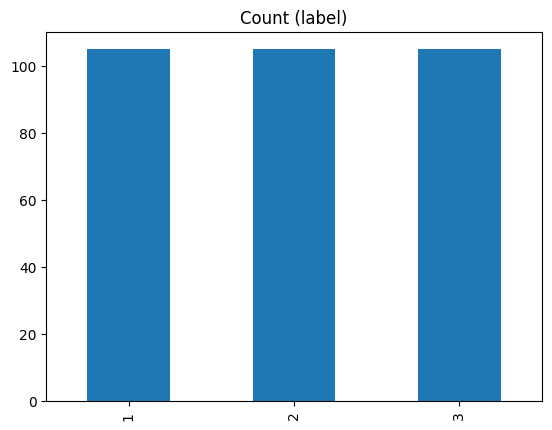

In [51]:
df_class_1_over = df_class_1.sample(105, replace=True, random_state = 42)
df_class_3_over = df_class_3.sample(105, replace=True, random_state = 42)

Btrain_over = pd.concat([df_class_1_over, df_class_2, df_class_3_over], axis=0)

print('Random over-sampling:')
print(Btrain_over.label.value_counts())

Btrain_over.label.value_counts().plot(kind='bar', title='Count (label)');

In [52]:
# from collections import Counter

# # Assuming Btrain['cleanText'] is a list or pandas Series
# text_samples = Btrain['cleanText']
# labels = Btrain['label']

# # Use Counter to count the frequency of each sample
# sample_frequency = Counter(zip(text_samples, labels))

# # Print the frequency of each sample along with its label
# for (sample, label), frequency in sample_frequency.items():
#     print(f"Sample: {sample}, Label: {label}, Frequency: {frequency}")

In [53]:
X_train_over = Btrain_over['cleanText'].tolist()
y_train_over = Btrain_over['label'].tolist()

In [54]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_over)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Multinomial Naive Bayes
model_mnb = MultinomialNB()
model_mnb.fit(X_train_tfidf, y_train_over)

# Predict on the validation set
y_pred_mnb = model_mnb.predict(X_val_tfidf)

# Evaluation
accuracy_mnb = accuracy_score(Bval['label'].tolist(), y_pred_mnb)
classification_report_mnb = classification_report(Bval['label'].tolist(), y_pred_mnb, digits = 4)

print(f'MNB Accuracy: {accuracy_mnb}')
print('Classification Report for MNB:\n', classification_report_mnb)


MNB Accuracy: 0.8866666666666667
Classification Report for MNB:
               precision    recall  f1-score   support

           1     0.9412    0.9333    0.9372       120
           2     0.8500    0.7391    0.7907        23
           3     0.3636    0.5714    0.4444         7

    accuracy                         0.8867       150
   macro avg     0.7183    0.7480    0.7241       150
weighted avg     0.9002    0.8867    0.8918       150



In [56]:
y_pred = model_mnb.predict(X_test_tfidf)

In [57]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(Bval['label'].tolist(), y_pred)
classification_report_svm = classification_report(Bval['label'].tolist(), y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8666666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1       0.96      0.90      0.93       120
           2       0.58      0.91      0.71        23
           3       0.50      0.14      0.22         7

    accuracy                           0.87       150
   macro avg       0.68      0.65      0.62       150
weighted avg       0.88      0.87      0.86       150



## Random Over sampling

Random over-sampling:
1    105
2    105
3    105
Name: label, dtype: int64


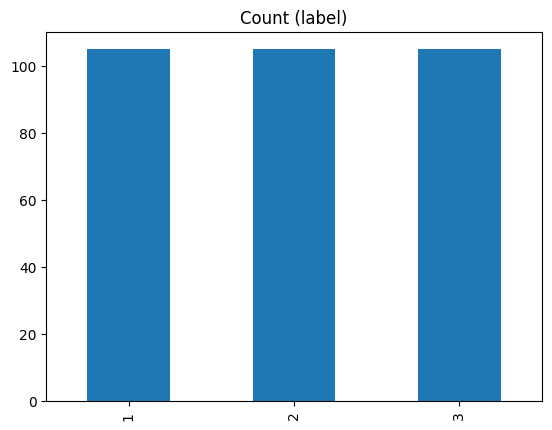

In [59]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming Btrain is your original dataframe
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(Btrain[['cleanText']], Btrain['label'])

# Create a new dataframe with the resampled data
Btrain_over = pd.DataFrame({'cleanText': X_ros['cleanText'], 'label': y_ros})

# Check the value counts
print('Random over-sampling:')
print(Btrain_over.label.value_counts())

# Plot the counts
Btrain_over.label.value_counts().plot(kind='bar', title='Count (label)');


In [60]:
y_ros

0      1
1      2
2      2
3      2
4      2
      ..
310    3
311    3
312    3
313    3
314    3
Name: label, Length: 315, dtype: int64

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_ros['cleanText'])
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)
# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_ros)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(Bval['label'].tolist(), y_pred)
classification_report_svm = classification_report(Bval['label'].tolist(), y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94       120
           2       0.66      0.91      0.76        23
           3       0.50      0.14      0.22         7

    accuracy                           0.89       150
   macro avg       0.70      0.66      0.64       150
weighted avg       0.89      0.89      0.88       150



In [62]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes
model_mnb = MultinomialNB()
model_mnb.fit(X_train_tfidf, y_ros)

# Predict on the validation set
y_pred_mnb = model_mnb.predict(X_val_tfidf)

# Evaluation
accuracy_mnb = accuracy_score(Bval['label'].tolist(), y_pred_mnb)
classification_report_mnb = classification_report(Bval['label'].tolist(), y_pred_mnb)

print(f'MNB Accuracy: {accuracy_mnb}')
print('Classification Report for MNB:\n', classification_report_mnb)


MNB Accuracy: 0.8733333333333333
Classification Report for MNB:
               precision    recall  f1-score   support

           1       0.92      0.94      0.93       120
           2       0.88      0.61      0.72        23
           3       0.36      0.57      0.44         7

    accuracy                           0.87       150
   macro avg       0.72      0.71      0.70       150
weighted avg       0.89      0.87      0.87       150



In [63]:
y_pred = model_mnb.predict(X_test_tfidf)

In [64]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/kaggle/working/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

## Oversampling Another Strategy

In [65]:
Btrain['label'].value_counts()

2    105
1     61
3     31
Name: label, dtype: int64

In [66]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming 'cleanText' is the column containing your text data and 'label' is the column containing labels
X_minority_1 = Btrain[Btrain['label'] == 1]['cleanText']
y_minority_1 = Btrain[Btrain['label'] == 1]['label']
oversample_factor_1 = 2

X_minority_2 = Btrain[Btrain['label'] == 2]['cleanText']
y_minority_2 = Btrain[Btrain['label'] == 2]['label']
oversample_factor_2 = 1

X_minority_3 = Btrain[Btrain['label'] == 3]['cleanText']
y_minority_3 = Btrain[Btrain['label'] == 3]['label']
oversample_factor_3 = 3

# Oversample each minority class by duplicating each sample
X_oversampled_1 = np.repeat(X_minority_1, oversample_factor_1)
y_oversampled_1 = np.repeat(y_minority_1, oversample_factor_1)

X_oversampled_2 = np.repeat(X_minority_2, oversample_factor_2)
y_oversampled_2 = np.repeat(y_minority_2, oversample_factor_2)

X_oversampled_3 = np.repeat(X_minority_3, oversample_factor_3)
y_oversampled_3 = np.repeat(y_minority_3, oversample_factor_3)

# Combine the oversampled minority classes with the majority class
X_resampled = pd.concat([pd.Series(X_oversampled_1), pd.Series(X_oversampled_2), pd.Series(X_oversampled_3)])
y_resampled = pd.concat([pd.Series(y_oversampled_1), pd.Series(y_oversampled_2), pd.Series(y_oversampled_3)])

# Shuffle the data
oversampled_df = pd.concat([X_resampled, y_resampled], axis=1)
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [67]:
oversampled_df['label'].value_counts()

1    122
2    105
3     93
Name: label, dtype: int64

In [68]:
X_train_over = oversampled_df['cleanText'].tolist()
y_train_over = oversampled_df['label'].tolist()

In [69]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_over)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

In [70]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes
model_mnb = MultinomialNB()
model_mnb.fit(X_train_tfidf, y_train_over)

# Predict on the validation set
y_pred_mnb = model_mnb.predict(X_val_tfidf)

# Evaluation
accuracy_mnb = accuracy_score(Bval['label'].tolist(), y_pred_mnb)
classification_report_mnb = classification_report(Bval['label'].tolist(), y_pred_mnb)

print(f'MNB Accuracy: {accuracy_mnb}')
print('Classification Report for MNB:\n', classification_report_mnb)

MNB Accuracy: 0.8666666666666667
Classification Report for MNB:
               precision    recall  f1-score   support

           1       0.90      0.96      0.93       120
           2       0.72      0.57      0.63        23
           3       0.50      0.29      0.36         7

    accuracy                           0.87       150
   macro avg       0.71      0.60      0.64       150
weighted avg       0.85      0.87      0.86       150



In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_ros['cleanText'])
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)
# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_ros)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(Bval['label'].tolist(), y_pred)
classification_report_svm = classification_report(Bval['label'].tolist(), y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94       120
           2       0.66      0.91      0.76        23
           3       0.50      0.14      0.22         7

    accuracy                           0.89       150
   macro avg       0.70      0.66      0.64       150
weighted avg       0.89      0.89      0.88       150



# ML Models

## TF-IDF

In [76]:
X_train_over = X_ros['cleanText'].tolist()
y_train_over = y_ros.tolist()

In [77]:
y_train_over = [label - 1 for label in y_train_over]

In [ ]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_over)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

### Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid_rf = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': ['balanced', None]
# }

# # Create a RandomForestClassifier
# rf_classifier = RandomForestClassifier()

# # Create the GridSearchCV object
# grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
#                                scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search_rf.fit(X_train_tfidf, X_train_over)

# # Print the best parameters and the corresponding accuracy
# print("Best Parameters: ", grid_search_rf.best_params_)
# print("Best Accuracy: ", grid_search_rf.best_score_)

# # Get the best model
# best_rf_model = grid_search_rf.best_estimator_

# # Predict on the validation set
# y_pred_val = best_rf_model.predict(X_val_tfidf)

# # Evaluate the model
# accuracy_val = accuracy_score(y_val, y_pred_val)
# classification_report_val = classification_report(y_val, y_pred_val)

# print("Validation Accuracy: ", accuracy_val)
# print("Classification Report (Validation):\n", classification_report_val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train_over)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = model_rf.predict(X_val_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.8466666666666667
Classification Report:
              precision    recall  f1-score   support

           1     0.9469    0.8917    0.9185       120
           2     0.5278    0.8261    0.6441        23
           3     1.0000    0.1429    0.2500         7

    accuracy                         0.8467       150
   macro avg     0.8249    0.6202    0.6042       150
weighted avg     0.8851    0.8467    0.8452       150



In [ ]:
y_pred = model_rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.8866666666666667
Classification Report:
              precision    recall  f1-score   support

           1     0.9823    0.9174    0.9487       121
           2     0.6061    0.8696    0.7143        23
           3     0.5000    0.3333    0.4000         6

    accuracy                         0.8867       150
   macro avg     0.6961    0.7068    0.6877       150
weighted avg     0.9053    0.8867    0.8908       150



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train_over)

LogisticRegression(C=1, solver='liblinear')

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr, digits = 4)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.8733333333333333
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1     0.9661    0.9421    0.9540       121
           2     0.5926    0.6957    0.6400        23
           3     0.2000    0.1667    0.1818         6

    accuracy                         0.8733       150
   macro avg     0.5862    0.6015    0.5919       150
weighted avg     0.8782    0.8733    0.8749       150



In [ ]:
y_pred = model_lr.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred_nb = model_nb.predict(X_val_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_valid, y_pred_nb)
classification_report_nb = classification_report(y_valid, y_pred_nb, digits = 4)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)


Multinomial Naive Bayes Accuracy: 0.88
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           1     0.9262    0.9417    0.9339       120
           2     0.8889    0.6957    0.7805        23
           3     0.3000    0.4286    0.3529         7

    accuracy                         0.8800       150
   macro avg     0.7050    0.6886    0.6891       150
weighted avg     0.8913    0.8800    0.8833       150



In [ ]:
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb, digits = 4)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)

Multinomial Naive Bayes Accuracy: 0.8866666666666667
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           1     0.9512    0.9669    0.9590       121
           2     0.7647    0.5652    0.6500        23
           3     0.3000    0.5000    0.3750         6

    accuracy                         0.8867       150
   macro avg     0.6720    0.6774    0.6613       150
weighted avg     0.8966    0.8867    0.8883       150



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred = model_svm.predict(X_val_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_valid, y_pred)
classification_report_svm = classification_report(y_valid, y_pred, digits = 4)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1     0.9565    0.9167    0.9362       120
           2     0.6562    0.9130    0.7636        23
           3     0.6667    0.2857    0.4000         7

    accuracy                         0.8867       150
   macro avg     0.7598    0.7051    0.6999       150
weighted avg     0.8970    0.8867    0.8847       150



In [ ]:
# Predict on the test set
y_pred = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred, digits = 4)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm)

SVM Accuracy: 0.8866666666666667
Classification Report for SVM:
               precision    recall  f1-score   support

           1     0.9741    0.9339    0.9536       121
           2     0.6129    0.8261    0.7037        23
           3     0.3333    0.1667    0.2222         6

    accuracy                         0.8867       150
   macro avg     0.6401    0.6422    0.6265       150
weighted avg     0.8931    0.8867    0.8860       150



In [ ]:
y_pred = model_svm.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submission.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

### Ensemble Majority Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Example: Training individual models
model_rf = RandomForestClassifier()  #use class_weight='balanced' if classes are imbalanced
model_rf.fit(X_train_tfidf, y_train_over)

model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train_over)

model_svm = SVC()    #kernel='poly'  kernel='rbf'   kernel='sigmoid'
model_svm.fit(X_train_tfidf, y_train_over)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_tfidf, y_train_over)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and trained models
models = [
    ('RandomForest', model_rf),
    ('LogisticRegression', model_lr),
    ('SVM', model_svm),
    ('DecisionTree', model_dt)
]

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='hard') # 'hard' voting for majority class
ensemble_model.fit(X_train_tfidf, y_train_over)


VotingClassifier(estimators=[('RandomForest', RandomForestClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('SVM', SVC()),
                             ('DecisionTree', DecisionTreeClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8533333333333334
Classification Report:
              precision    recall  f1-score   support

           1     0.9554    0.8917    0.9224       120
           2     0.5405    0.8696    0.6667        23
           3     1.0000    0.1429    0.2500         7

    accuracy                         0.8533       150
   macro avg     0.8320    0.6347    0.6130       150
weighted avg     0.8938    0.8533    0.8518       150



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 4)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8866666666666667
Classification Report:
              precision    recall  f1-score   support

           1     0.9911    0.9174    0.9528       121
           2     0.5946    0.9565    0.7333        23
           3     0.0000    0.0000    0.0000         6

    accuracy                         0.8867       150
   macro avg     0.5286    0.6246    0.5620       150
weighted avg     0.8906    0.8867    0.8810       150



In [ ]:
y_pred = ensemble_model.predict(X_test_tfidf)

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Bval["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissiondev.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("submissiondev.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissiondev.json")

## Word2Vec(spacy)

In [ ]:
!python -m spacy download en_core_web_md

2024-01-06 13:30:37.401820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 13:30:37.401872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 13:30:37.403174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 13:30:38.560548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/42.8 MB 5.5 MB/s eta 0:00:08
ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [ ]:
import spacy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Tokenize and extract word vectors using spaCy
def spacy_word_vectors(text):
    doc = nlp(text)
    return doc.vector

# Apply spaCy word vectors extraction to the training set
X_train_spacy = [spacy_word_vectors(text) for text in X_train_over]

# Apply spaCy word vectors extraction to the validation set
X_valid_spacy = [spacy_word_vectors(text) for text in X_valid]

# Apply spaCy word vectors extraction to the test set
X_test_spacy = [spacy_word_vectors(text) for text in X_test]

### SVM

In [ ]:
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_spacy, y_train_over)

# Predict on the validation set
y_pred_valid = model_svm.predict(X_valid_spacy)

# Predict on the test set
y_pred_test = model_svm.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_svm_valid = accuracy_score(y_valid, y_pred_valid)
classification_report_svm_valid = classification_report(y_valid, y_pred_valid, digits = 4)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_valid}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_valid)

SVM Accuracy on Validation Set: 0.88
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           1     0.9407    0.9250    0.9328       120
           2     0.6923    0.7826    0.7347        23
           3     0.5000    0.4286    0.4615         7

    accuracy                         0.8800       150
   macro avg     0.7110    0.7121    0.7097       150
weighted avg     0.8820    0.8800    0.8804       150



In [ ]:
# Predict on the test set
y_pred_test = model_svm.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_svm_test = accuracy_score(y_test, y_pred_test)
classification_report_svm_test = classification_report(y_test, y_pred_test, digits = 4)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_test}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_test)

SVM Accuracy on Validation Set: 0.8933333333333333
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           1     0.9580    0.9421    0.9500       121
           2     0.7083    0.7391    0.7234        23
           3     0.4286    0.5000    0.4615         6

    accuracy                         0.8933       150
   macro avg     0.6983    0.7271    0.7116       150
weighted avg     0.8985    0.8933    0.8957       150



### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_spacy)
scaled_val_embed = scaler.transform(X_valid_spacy)
scaled_test_embed = scaler.transform(X_test_spacy)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes (MNB)
model_mnb = MultinomialNB()
model_mnb.fit(scaled_train_embed, y_train_over)

# Predict on the validation set
y_pred_valid_mnb = model_mnb.predict(scaled_val_embed)

# Predict on the test set
y_pred_test_mnb = model_mnb.predict(scaled_test_embed)

# Evaluation on the validation set
accuracy_mnb_valid = accuracy_score(y_valid, y_pred_valid_mnb)
classification_report_mnb_valid = classification_report(y_valid, y_pred_valid_mnb, digits = 4)

print(f'MNB Accuracy on Validation Set: {accuracy_mnb_valid}')
print('Classification Report for MNB on Validation Set:\n', classification_report_mnb_valid)

# You can use y_pred_test_mnb for predictions on the test set


MNB Accuracy on Validation Set: 0.84
Classification Report for MNB on Validation Set:
               precision    recall  f1-score   support

           1     0.9316    0.9083    0.9198       120
           2     0.5833    0.6087    0.5957        23
           3     0.3333    0.4286    0.3750         7

    accuracy                         0.8400       150
   macro avg     0.6161    0.6485    0.6302       150
weighted avg     0.8503    0.8400    0.8447       150



In [ ]:
# Predict on the test set
y_pred_test = model_mnb.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_mnb_test = accuracy_score(y_test, y_pred_test)
classification_report_mnb_test = classification_report(y_test, y_pred_test, digits = 4)

print(f'mnb Accuracy on Validation Set: {accuracy_mnb_test}')
print('Classification Report for mnb on Validation Set:\n', classification_report_svm_test)

mnb Accuracy on Validation Set: 0.05333333333333334
Classification Report for mnb on Validation Set:
               precision    recall  f1-score   support

           1     0.9580    0.9421    0.9500       121
           2     0.7083    0.7391    0.7234        23
           3     0.4286    0.5000    0.4615         6

    accuracy                         0.8933       150
   macro avg     0.6983    0.7271    0.7116       150
weighted avg     0.8985    0.8933    0.8957       150



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression (LR)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_spacy, y_train_over)

# Predict on the validation set
y_pred_valid_lr = model_lr.predict(X_valid_spacy)

# Predict on the test set
y_pred_test_lr = model_lr.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_lr_valid = accuracy_score(y_valid, y_pred_valid_lr)
classification_report_lr_valid = classification_report(y_valid, y_pred_valid_lr, digits = 4)

print(f'LR Accuracy on Validation Set: {accuracy_lr_valid}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_valid)

# You can use y_pred_test_lr for predictions on the test set

LR Accuracy on Validation Set: 0.8733333333333333
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           1     0.9402    0.9167    0.9283       120
           2     0.6667    0.7826    0.7200        23
           3     0.5000    0.4286    0.4615         7

    accuracy                         0.8733       150
   macro avg     0.7023    0.7093    0.7033       150
weighted avg     0.8777    0.8733    0.8746       150



In [ ]:
# Predict on the test set
y_pred_test = model_lr.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_lr_test = accuracy_score(y_test, y_pred_test)
classification_report_lr_test = classification_report(y_test, y_pred_test, digits = 4)

print(f'lr Accuracy on Validation Set: {accuracy_lr_test}')
print('Classification Report for lr on Validation Set:\n', classification_report_lr_test)

lr Accuracy on Validation Set: 0.8866666666666667
Classification Report for lr on Validation Set:
               precision    recall  f1-score   support

           1     0.9658    0.9339    0.9496       121
           2     0.6538    0.7391    0.6939        23
           3     0.4286    0.5000    0.4615         6

    accuracy                         0.8867       150
   macro avg     0.6827    0.7243    0.7017       150
weighted avg     0.8965    0.8867    0.8909       150



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_spacy, y_train_over)
y_pred = model_rf.predict(X_valid_spacy)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, digits = 4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           1     0.9640    0.8917    0.9264       120
           2     0.5556    0.8696    0.6780        23
           3     0.6667    0.2857    0.4000         7

    accuracy                         0.8600       150
   macro avg     0.7287    0.6823    0.6681       150
weighted avg     0.8875    0.8600    0.8637       150



In [ ]:
# Predict on the test set
y_pred_test = model_rf.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
classification_report_rf_test = classification_report(y_test, y_pred_test, digits = 4)

print(f'rf Accuracy on Validation Set: {accuracy_rf_test}')
print('Classification Report for rf on Validation Set:\n', classification_report_rf_test)

rf Accuracy on Validation Set: 0.8733333333333333
Classification Report for rf on Validation Set:
               precision    recall  f1-score   support

           1     0.9649    0.9091    0.9362       121
           2     0.5882    0.8696    0.7018        23
           3     0.5000    0.1667    0.2500         6

    accuracy                         0.8733       150
   macro avg     0.6844    0.6484    0.6293       150
weighted avg     0.8886    0.8733    0.8728       150



# Deep Learning


## BiGRU


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model

In [ ]:
tokenizer = Tokenizer(num_words = 116000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(Btrain_over['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

1826


In [ ]:
max_len = 256
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train_over)
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

1825
Number of Training Sequences : (315, 256)
Number of Validation Sequences : (150, 256)
Number of test Sequences : (150, 256)


In [ ]:
Bval['enc_label'] = Bval['label'] - 1
Btrain_over['enc_label'] = Btrain_over['label'] - 1
Btest['enc_label'] = Btest['label'] - 1
print(Bval['enc_label'].unique())
print(Btrain_over['enc_label'].unique())

[0 1 2]
[0 1 2]


In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "OverTaskB_BiGRU_tf.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(GRU(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 300)          547800    
                                                                 
 bidirectional_1 (Bidirecti  (None, 256, 256)          330240    
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                 196611    
                                                                 
Total params: 1074651 (4.10 MB)
Trainable params: 1074651 (4.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 1.1958 - accuracy: 0.3175
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/OverTaskB_BiGRU_tf.h5
10/10 [==============================] - 15s 769ms/step - loss: 1.1958 - accuracy: 0.3175 - val_loss: 1.2379 - val_accuracy: 0.1533
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 1.0391 - accuracy: 0.4794
Epoch 2: val_accuracy improved from 0.15333 to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/OverTaskB_BiGRU_tf.h5
10/10 [==============================] - 3s 307ms/step - loss: 1.0391 - accuracy: 0.4794 - val_loss: 1.0991 - val_accuracy: 0.1800
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.7389 - accuracy: 0.7841
Epoch 3: val_accuracy improved from 0.18000 to 0.78667, saving model to /content/drive/MyDrive/Colab Notebooks/case/OverTaskB_BiGRU_tf.h5
10/10 [==============================] - 3s 

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(Bval['enc_label'],y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(Bval['enc_label'],y_pred)*100)

5/5 [==============================] - 1s 17ms/step
F1-Score: 60.27982365829836
Accuracy: 85.33333333333334


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(Bval['enc_label'], y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       120
           1       0.53      0.87      0.66        23
           2       0.50      0.14      0.22         7

    accuracy                           0.85       150
   macro avg       0.67      0.63      0.60       150
weighted avg       0.88      0.85      0.86       150



In [ ]:
y_pred = np.argmax(model.predict(test_pad_sequences), axis=-1)
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(Btest['enc_label'], y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

5/5 [==============================] - 0s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       121
           1       0.60      0.91      0.72        23
           2       0.33      0.17      0.22         6

    accuracy                           0.89       150
   macro avg       0.64      0.67      0.63       150
weighted avg       0.90      0.89      0.89       150



## Glove BiLSTM + CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_file = '/content/drive/MyDrive/Colab Notebooks/case/glove.twitter.27B.100d.txt'  # Specify the path to your GloVe file
word2vec_output_file = '/content/drive/MyDrive/Colab Notebooks/case/glove.twitter.27B.100d.word2vec'
glove2word2vec(glove_file, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [ ]:
# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming GloVe embeddings are 300-dimensional
for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [ ]:
folderpath = "/content/drive/MyDrive/Colab Notebooks/case/TaskB"

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "Overglovebilstmcnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 100)          182600    
                                                                 
 bidirectional_2 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 conv1d (Conv1D)             (None, 254, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 84, 64)            0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5376)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0919 - accuracy: 0.3302
Epoch 1: val_accuracy improved from -inf to 0.72000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstmcnn.h5
10/10 [==============================] - 18s 412ms/step - loss: 1.0919 - accuracy: 0.3302 - val_loss: 1.0624 - val_accuracy: 0.7200
Epoch 2/20
 9/10 [==========================>...] - ETA: 0s - loss: 1.0224 - accuracy: 0.4861
Epoch 2: val_accuracy improved from 0.72000 to 0.77333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstmcnn.h5
10/10 [==============================] - 1s 83ms/step - loss: 1.0098 - accuracy: 0.5016 - val_loss: 1.0102 - val_accuracy: 0.7733
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.8144 - accuracy: 0.6840
Epoch 3: val_accuracy improved from 0.77333 to 0.78000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstmcnn.h5
10/10 [=======================

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 2s 18ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9231    0.9000    0.9114       120
           1     0.4688    0.6522    0.5455        23
           2     1.0000    0.1429    0.2500         7

    accuracy                         0.8267       150
   macro avg     0.7973    0.5650    0.5689       150
weighted avg     0.8570    0.8267    0.8244       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 4s 16ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9180    0.9256    0.9218       121
           1     0.5833    0.6087    0.5957        23
           2     0.2500    0.1667    0.2000         6

    accuracy                         0.8467       150
   macro avg     0.5838    0.5670    0.5725       150
weighted avg     0.8400    0.8467    0.8429       150



## Glove BiLSTM

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "Overglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 100)          182600    
                                                                 
 bidirectional_3 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0340 - accuracy: 0.4698
Epoch 1: val_accuracy improved from -inf to 0.65333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstm.h5
10/10 [==============================] - 14s 486ms/step - loss: 1.0340 - accuracy: 0.4698 - val_loss: 1.0957 - val_accuracy: 0.6533
Epoch 2/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.7662 - accuracy: 0.6389
Epoch 2: val_accuracy improved from 0.65333 to 0.80000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstm.h5
10/10 [==============================] - 1s 113ms/step - loss: 0.7409 - accuracy: 0.6540 - val_loss: 0.8111 - val_accuracy: 0.8000
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8349
Epoch 3: val_accuracy improved from 0.80000 to 0.82667, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverglovebilstm.h5
10/10 [==============================]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9386    0.8917    0.9145       120
           1     0.5312    0.7391    0.6182        23
           2     0.2500    0.1429    0.1818         7

    accuracy                         0.8333       150
   macro avg     0.5733    0.5912    0.5715       150
weighted avg     0.8440    0.8333    0.8349       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

5/5 [==============================] - 2s 18ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9649    0.9091    0.9362       121
           1     0.5862    0.7391    0.6538        23
           2     0.2857    0.3333    0.3077         6

    accuracy                         0.8600       150
   macro avg     0.6123    0.6605    0.6326       150
weighted avg     0.8797    0.8600    0.8677       150



## Glove CNN + BiGRU

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "OverTaskBglovebigrucnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 256, 100)          182600    
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 128)           74496     
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0     

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.1081 - accuracy: 0.3937
Epoch 1: val_accuracy improved from -inf to 0.06667, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBglovebigrucnn.h5
10/10 [==============================] - 18s 327ms/step - loss: 1.1081 - accuracy: 0.3937 - val_loss: 1.1650 - val_accuracy: 0.0667
Epoch 2/20
 9/10 [==========================>...] - ETA: 0s - loss: 1.0548 - accuracy: 0.4722
Epoch 2: val_accuracy improved from 0.06667 to 0.78667, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBglovebigrucnn.h5
10/10 [==============================] - 1s 62ms/step - loss: 1.0512 - accuracy: 0.4667 - val_loss: 0.9667 - val_accuracy: 0.7867
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.6603
Epoch 3: val_accuracy did not improve from 0.78667
10/10 [==============================] - 0s 33ms/step - loss: 0.8568 - accuracy: 0.6603 - val_loss: 0.9066 - val_a

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 2s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9626    0.8583    0.9075       120
           1     0.4651    0.8696    0.6061        23
           2     0.0000    0.0000    0.0000         7

    accuracy                         0.8200       150
   macro avg     0.4759    0.5760    0.5045       150
weighted avg     0.8414    0.8200    0.8189       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 8ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9737    0.9174    0.9447       121
           1     0.5556    0.8696    0.6780        23
           2     0.0000    0.0000    0.0000         6

    accuracy                         0.8733       150
   macro avg     0.5097    0.5956    0.5409       150
weighted avg     0.8706    0.8733    0.8660       150



## FastText

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrixx = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrixx[i] = embedding_vector

## FastText CNN + BiLSTM

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"OverTaskBfasttext_CNNBiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 3, activation='relu'),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Bidirectional(LSTM(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 256, 300)          547800    
                                                                 
 conv1d_2 (Conv1D)           (None, 254, 128)          115328    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 84, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_5 (Bidirecti  (None, 84, 512)           788480    
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 43008)             0         
                                                                 
 dense_9 (Dense)             (None, 3)                

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.3619
Epoch 1: val_accuracy improved from -inf to 0.17333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBfasttext_CNNBiLSTMModel.h5
10/10 [==============================] - 10s 226ms/step - loss: 1.0900 - accuracy: 0.3619 - val_loss: 1.2296 - val_accuracy: 0.1733
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.4921
Epoch 2: val_accuracy did not improve from 0.17333
10/10 [==============================] - 0s 37ms/step - loss: 0.9506 - accuracy: 0.4921 - val_loss: 1.2329 - val_accuracy: 0.1600
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.6345 - accuracy: 0.6771
Epoch 3: val_accuracy did not improve from 0.17333
10/10 [==============================] - 0s 36ms/step - loss: 0.6301 - accuracy: 0.6857 - val_loss: 1.3338 - val_accuracy: 0.1533
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 2s 12ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8846    0.9583    0.9200       120
           1     0.6875    0.4783    0.5641        23
           2     0.2500    0.1429    0.1818         7

    accuracy                         0.8467       150
   macro avg     0.6074    0.5265    0.5553       150
weighted avg     0.8248    0.8467    0.8310       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 2s 18ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8992    0.9587    0.9280       121
           1     0.6875    0.4783    0.5641        23
           2     0.6000    0.5000    0.5455         6

    accuracy                         0.8667       150
   macro avg     0.7289    0.6456    0.6792       150
weighted avg     0.8548    0.8667    0.8569       150



## FastText CNN + BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"OverTaskBfasttext_CNNBiGRU.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrixx], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
# dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dense1)
# dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dense2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 256, 300)          547800    
                                                                 
 conv1d_4 (Conv1D)           (None, 252, 128)          192128    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_7 (Bidirecti  (None, 50, 128)           74496     
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0   

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0903 - accuracy: 0.3778
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBfasttext_CNNBiGRU.h5
10/10 [==============================] - 7s 154ms/step - loss: 1.0903 - accuracy: 0.3778 - val_loss: 1.1039 - val_accuracy: 0.1533
Epoch 2/20
 9/10 [==========================>...] - ETA: 0s - loss: 1.0013 - accuracy: 0.5000
Epoch 2: val_accuracy improved from 0.15333 to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBfasttext_CNNBiGRU.h5
10/10 [==============================] - 0s 41ms/step - loss: 0.9905 - accuracy: 0.5238 - val_loss: 1.1672 - val_accuracy: 0.1800
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.6656 - accuracy: 0.8125
Epoch 3: val_accuracy did not improve from 0.18000
10/10 [==============================] - 0s 26ms/step - loss: 0.6485 - accuracy: 0.8159 - val_loss: 1.4258 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 7ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6087    0.1167    0.1958       120
           1     0.1290    0.6957    0.2177        23
           2     0.3333    0.1429    0.2000         7

    accuracy                         0.2067       150
   macro avg     0.3570    0.3184    0.2045       150
weighted avg     0.5223    0.2067    0.1994       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 7ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.5833    0.1157    0.1931       121
           1     0.1138    0.6087    0.1918        23
           2     0.3333    0.1667    0.2222         6

    accuracy                         0.1933       150
   macro avg     0.3435    0.2970    0.2024       150
weighted avg     0.5013    0.1933    0.1941       150



## FastText BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath +"OverTaskBfasttext_BiGRUModel_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(GRU(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 256, 300)          547800    
                                                                 
 bidirectional_8 (Bidirecti  (None, 256, 512)          857088    
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 131072)            0         
                                                                 
 dense_16 (Dense)            (None, 3)                 393219    
                                                                 
Total params: 1798107 (6.86 MB)
Trainable params: 1250307 (4.77 MB)
Non-trainable params: 547800 (2.09 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
 9/10 [==========================>...] - ETA: 0s - loss: 1.0642 - accuracy: 0.4062
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverTaskBfasttext_BiGRUModel_FastText.h5
10/10 [==============================] - 6s 222ms/step - loss: 1.0571 - accuracy: 0.4317 - val_loss: 1.4895 - val_accuracy: 0.1667
Epoch 2/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.8917 - accuracy: 0.6042
Epoch 2: val_accuracy did not improve from 0.16667
10/10 [==============================] - 0s 47ms/step - loss: 0.8769 - accuracy: 0.6127 - val_loss: 1.1176 - val_accuracy: 0.1400
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.6622 - accuracy: 0.7326
Epoch 3: val_accuracy did not improve from 0.16667
10/10 [==============================] - 1s 54ms/step - loss: 0.6526 - accuracy: 0.7397 - val_loss: 1.3723 - val_accuracy: 0.1333
Epoch 4/20
 9/10 [==========================>...] - ETA: 0s - loss

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 23ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9237    0.9083    0.9160       120
           1     0.6000    0.6522    0.6250        23
           2     0.4286    0.4286    0.4286         7

    accuracy                         0.8467       150
   macro avg     0.6508    0.6630    0.6565       150
weighted avg     0.8510    0.8467    0.8486       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 23ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9200    0.9504    0.9350       121
           1     0.6667    0.6087    0.6364        23
           2     0.2500    0.1667    0.2000         6

    accuracy                         0.8667       150
   macro avg     0.6122    0.5753    0.5904       150
weighted avg     0.8544    0.8667    0.8598       150



## FastText BiLSTM

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folderpath + "OverFastTextglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 256, 300)          547800    
                                                                 
 bidirectional_9 (Bidirecti  (None, 256, 128)          186880    
 onal)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 32768)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Btrain_over['enc_label'],
    epochs=20,
    batch_size=32,
    validation_data=(validation_pad_sequences, Bval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.4222
Epoch 1: val_accuracy improved from -inf to 0.18000, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverFastTextglovebilstm.h5
10/10 [==============================] - 17s 360ms/step - loss: 1.0662 - accuracy: 0.4222 - val_loss: 1.1599 - val_accuracy: 0.1800
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9088 - accuracy: 0.5524
Epoch 2: val_accuracy did not improve from 0.18000
10/10 [==============================] - 1s 64ms/step - loss: 0.9088 - accuracy: 0.5524 - val_loss: 1.0901 - val_accuracy: 0.1400
Epoch 3/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.6727 - accuracy: 0.7326
Epoch 3: val_accuracy improved from 0.18000 to 0.81333, saving model to /content/drive/MyDrive/Colab Notebooks/case/TaskBOverFastTextglovebilstm.h5
10/10 [==============================] - 1s 104ms/step - loss: 0.6584 - accuracy: 0.7397 - val_loss: 0.9929 - va

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 3s 23ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9244    0.9167    0.9205       120
           1     0.6400    0.6957    0.6667        23
           2     0.3333    0.2857    0.3077         7

    accuracy                         0.8533       150
   macro avg     0.6326    0.6327    0.6316       150
weighted avg     0.8532    0.8533    0.8530       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


5/5 [==============================] - 1s 16ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9206    0.9587    0.9393       121
           1     0.6316    0.5217    0.5714        23
           2     0.2000    0.1667    0.1818         6

    accuracy                         0.8600       150
   macro avg     0.5841    0.5490    0.5642       150
weighted avg     0.8475    0.8600    0.8526       150



# ktrain

In [72]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=bf0f2bf18ecc7d85068cb12d557bf7c5cb81b386a9e4e9c0e3ce456d06e6ea58
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [73]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [74]:
import ktrain
from ktrain import text

In [75]:
categories=['1', '2', '3']

In [78]:
set(y_train_over)

{0, 1, 2}

## Ktrain mBert

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 30


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

In [ ]:
CasedmBertlearner.fit_onecycle(3e-5, 8)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/8
20/20 [==============================] - 47s 1s/step - loss: 1.1061 - accuracy: 0.3206 - val_loss: 1.1419 - val_accuracy: 0.1533
Epoch 2/8
20/20 [==============================] - 20s 994ms/step - loss: 1.0867 - accuracy: 0.3714 - val_loss: 1.1969 - val_accuracy: 0.1867
Epoch 3/8
20/20 [==============================] - 20s 988ms/step - loss: 0.9278 - accuracy: 0.5365 - val_loss: 1.2216 - val_accuracy: 0.2400
Epoch 4/8
20/20 [==============================] - 20s 990ms/step - loss: 0.4946 - accuracy: 0.8254 - val_loss: 0.4845 - val_accuracy: 0.8467
Epoch 5/8
20/20 [==============================] - 20s 990ms/step - loss: 0.2446 - accuracy: 0.9111 - val_loss: 0.2984 - val_accuracy: 0.9133
Epoch 6/8
20/20 [==============================] - 20s 990ms/step - loss: 0.1237 - accuracy: 0.9714 - val_loss: 0.4200 - val_accuracy: 0.8800
Epoch 7/8
20/20 [==============================] - 20s 995ms/step - loss: 0.0388 - accur

In [ ]:
CasedmBertlearner.validate(class_names=categories)

5/5 [==============================] - 10s 736ms/step
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       120
           2       0.72      0.78      0.75        23
           3       0.80      0.57      0.67         7

    accuracy                           0.90       150
   macro avg       0.82      0.77      0.79       150
weighted avg       0.90      0.90      0.90       150



array([[113,   6,   1],
       [  5,  18,   0],
       [  2,   1,   4]])

In [ ]:
predictor = ktrain.get_predictor(CasedmBertlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)

In [ ]:
accuracy_mbert = accuracy_score(Btest['label'], y_pred)
classification_report_mbert = classification_report(Btest['label'], y_pred)

print(f'mBERT Accuracy: {accuracy_mbert}')
print('Classification Report for mBERT:\n', classification_report_mbert) # 0.63      0.63      0.63

mBERT Accuracy: 0.8866666666666667
Classification Report for mBERT:
               precision    recall  f1-score   support

           1       0.97      0.91      0.94       121
           2       0.62      0.87      0.73        23
           3       0.60      0.50      0.55         6

    accuracy                           0.89       150
   macro avg       0.73      0.76      0.74       150
weighted avg       0.91      0.89      0.89       150



In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/OvertaskbmBERTCasedOver')

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submission.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("ref.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submission.json")

## Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 30


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
Distillearner.fit_onecycle(3e-5,8)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/8
20/20 [==============================] - 34s 743ms/step - loss: 1.0969 - accuracy: 0.3714 - val_loss: 1.0950 - val_accuracy: 0.1933
Epoch 2/8
20/20 [==============================] - 11s 539ms/step - loss: 0.9702 - accuracy: 0.5873 - val_loss: 1.0084 - val_accuracy: 0.3800
Epoch 3/8
20/20 [==============================] - 12s 589ms/step - loss: 0.5893 - accuracy: 0.7746 - val_loss: 0.5554 - val_accuracy: 0.8533
Epoch 4/8
20/20 [==============================] - 10s 513ms/step - loss: 0.2122 - accuracy: 0.9333 - val_loss: 0.4166 - val_accuracy: 0.8867
Epoch 5/8
20/20 [==============================] - 10s 528ms/step - loss: 0.0513 - accuracy: 0.9968 - val_loss: 0.6240 - val_accuracy: 0.8333
Epoch 6/8
20/20 [==============================] - 11s 574ms/step - loss: 0.0551 - accuracy: 0.9873 - val_loss: 0.4939 - val_accuracy: 0.8667
Epoch 7/8
20/20 [==============================] - 10s 508ms/step - loss: 0.0266 - ac

In [ ]:
Distillearner.validate(class_names=categories)

5/5 [==============================] - 3s 290ms/step
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       120
           2       0.70      0.70      0.70        23
           3       0.50      0.29      0.36         7

    accuracy                           0.88       150
   macro avg       0.71      0.64      0.67       150
weighted avg       0.87      0.88      0.87       150



array([[114,   4,   2],
       [  7,  16,   0],
       [  2,   3,   2]])

In [ ]:
predictor = ktrain.get_predictor(Distillearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)

In [ ]:
accuracy_DistilBERT = accuracy_score(Btest['label'], y_pred)
classification_report_DistilBERT = classification_report(Btest['label'], y_pred)

print(f'DistilBERT Accuracy: {accuracy_DistilBERT}')
print('Classification Report for DistilBERT:\n', classification_report_DistilBERT) # 0.63      0.63      0.63

DistilBERT Accuracy: 0.8866666666666667
Classification Report for DistilBERT:
               precision    recall  f1-score   support

           1       0.94      0.93      0.94       121
           2       0.65      0.74      0.69        23
           3       0.75      0.50      0.60         6

    accuracy                           0.89       150
   macro avg       0.78      0.72      0.74       150
weighted avg       0.89      0.89      0.89       150



In [ ]:
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/OvertaskbDistilmBERT')

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissiondistil.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("distilmBERTTaskB.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissiondistil.json")

## Ktrain XLMR

In [79]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 30


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [80]:
XLlearner.fit_onecycle(2e-5,10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
20/20 [==============================] - 50s 1s/step - loss: 1.1024 - accuracy: 0.3238 - val_loss: 1.1406 - val_accuracy: 0.1533
Epoch 2/10
20/20 [==============================] - 19s 970ms/step - loss: 1.0989 - accuracy: 0.3429 - val_loss: 1.1229 - val_accuracy: 0.1533
Epoch 3/10
20/20 [==============================] - 20s 993ms/step - loss: 1.0903 - accuracy: 0.3683 - val_loss: 1.1560 - val_accuracy: 0.1867
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 1.0284 - accuracy: 0.5302 - val_loss: 0.8752 - val_accuracy: 0.8533
Epoch 5/10
20/20 [==============================] - 20s 1s/step - loss: 0.7867 - accuracy: 0.7143 - val_loss: 0.6873 - val_accuracy: 0.8133
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 0.5604 - accuracy: 0.8222 - val_loss: 0.4018 - val_accuracy: 0.8733
Epoch 7/10
20/20 [==============================] - 20s 1s/step - loss: 0.3426 - accuracy: 

In [81]:
XLlearner.validate(class_names=categories)

5/5 [==============================] - 7s 569ms/step
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       120
           2       0.61      0.74      0.67        23
           3       1.00      0.29      0.44         7

    accuracy                           0.88       150
   macro avg       0.85      0.66      0.68       150
weighted avg       0.89      0.88      0.88       150



array([[113,   7,   0],
       [  6,  17,   0],
       [  1,   4,   2]])

In [82]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [83]:
y_pred = np.array(y_pred).astype(int)

In [86]:
y_pred = y_pred - 1

In [85]:
set(y_test)

{0, 1, 2}

In [87]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_XLMR = accuracy_score(y_test, y_pred)
classification_report_XLMR = classification_report(y_test, y_pred)

print(f'XLMR Accuracy: {accuracy_XLMR}')
print('Classification Report for XLMR:\n', classification_report_XLMR) # 0.63      0.63      0.63

XLMR Accuracy: 0.8733333333333333
Classification Report for XLMR:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       121
           1       0.62      0.70      0.65        23
           2       0.50      0.17      0.25         6

    accuracy                           0.87       150
   macro avg       0.68      0.60      0.61       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
y_pred = np.array(y_pred).astype(int)
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/Overtaskbxlmr')

In [ ]:
import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submissionxlmr.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("TaskBXLMR.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submissionxlmr.json")


## Ktrain ClimateBERT

In [ ]:
model_name = 'climatebert/distilroberta-base-climate-f'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
AlbertLearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 28
	99percentile : 30


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
AlbertLearner.fit_onecycle(3e-5,8)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/8
20/20 [==============================] - 35s 779ms/step - loss: 1.1035 - accuracy: 0.3365 - val_loss: 1.1069 - val_accuracy: 0.1533
Epoch 2/8
20/20 [==============================] - 10s 515ms/step - loss: 0.9844 - accuracy: 0.5302 - val_loss: 0.5798 - val_accuracy: 0.8800
Epoch 3/8
20/20 [==============================] - 10s 510ms/step - loss: 0.7018 - accuracy: 0.7206 - val_loss: 0.4721 - val_accuracy: 0.8400
Epoch 4/8
20/20 [==============================] - 10s 504ms/step - loss: 0.2376 - accuracy: 0.9333 - val_loss: 0.3452 - val_accuracy: 0.8933
Epoch 5/8
20/20 [==============================] - 10s 490ms/step - loss: 0.0778 - accuracy: 0.9810 - val_loss: 0.4393 - val_accuracy: 0.8800
Epoch 6/8
20/20 [==============================] - 10s 486ms/step - loss: 0.0202 - accuracy: 0.9968 - val_loss: 0.5263 - val_accuracy: 0.8867
Epoch 7/8
20/20 [==============================] - 10s 489ms/step - loss: 0.0070 - ac

In [ ]:
AlbertLearner.validate(class_names=categories)

5/5 [==============================] - 3s 289ms/step
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       120
           2       0.64      0.78      0.71        23
           3       0.75      0.43      0.55         7

    accuracy                           0.89       150
   macro avg       0.78      0.71      0.73       150
weighted avg       0.89      0.89      0.89       150



array([[112,   7,   1],
       [  5,  18,   0],
       [  1,   3,   3]])

In [ ]:
predictor = ktrain.get_predictor(AlbertLearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [ ]:
y_pred = np.array(y_pred).astype(int)
# predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/OvertaskbAlbert')

In [ ]:
y_pred = y_pred - 1

In [ ]:
accuracy_climatebert = accuracy_score(y_test, y_pred)
classification_report_climatebert = classification_report(y_test, y_pred)

print(f'climatebert Accuracy: {accuracy_climatebert}')
print('Classification Report for climatebert:\n', classification_report_climatebert) # 0.63      0.63      0.63

climatebert Accuracy: 0.88
Classification Report for climatebert:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       121
           1       0.73      0.70      0.71        23
           2       0.50      0.50      0.50         6

    accuracy                           0.88       150
   macro avg       0.72      0.71      0.71       150
weighted avg       0.88      0.88      0.88       150



In [ ]:
import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submissionalbert.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submissionalbert.json")


## Ktrain mBert Uncased

In [ ]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, X_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
model = trans.get_classifier()
mBertUncasedLearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=8)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 33


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 27
	99percentile : 29


Is Multi-Label? False


In [ ]:
mBertUncasedLearner.fit_onecycle(3e-5,15, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
16/16 [==============================] - 64s 1s/step - loss: 1.0754 - accuracy: 0.2734 - val_loss: 0.8603 - val_accuracy: 0.7667
Epoch 2/15
16/16 [==============================] - 16s 991ms/step - loss: 1.0158 - accuracy: 0.3555 - val_loss: 0.8554 - val_accuracy: 0.6933
Epoch 3/15
16/16 [==============================] - 16s 1s/step - loss: 0.9386 - accuracy: 0.4766 - val_loss: 0.6905 - val_accuracy: 0.8133
Epoch 4/15
16/16 [==============================] - 16s 1s/step - loss: 0.9315 - accuracy: 0.5664 - val_loss: 0.6666 - val_accuracy: 0.7800
Epoch 5/15
16/16 [==============================] - 19s 1s/step - loss: 0.7629 - accuracy: 0.6836 - val_loss: 0.5602 - val_accuracy: 0.8333
Epoch 6/15
16/16 [==============================] - 17s 1s/step - loss: 0.7932 - accuracy: 0.6172 - val_loss: 0.6061 - val_accuracy: 0.7600
Epoch 7/15
16/16 [==============================] - 19s 1s/step - loss: 0.5816 - accuracy: 0.7

In [ ]:
mBertUncasedLearner.validate(class_names=categories)

5/5 [==============================] - 7s 622ms/step
              precision    recall  f1-score   support

           1       0.97      0.94      0.96       120
           2       0.68      0.83      0.75        23
           3       0.67      0.57      0.62         7

    accuracy                           0.91       150
   macro avg       0.77      0.78      0.77       150
weighted avg       0.91      0.91      0.91       150



array([[113,   7,   0],
       [  2,  19,   2],
       [  1,   2,   4]])

In [ ]:
predictor = ktrain.get_predictor(mBertUncasedLearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
y_pred = np.array(y_pred).astype(int)
predictor.save('/content/drive/MyDrive/Colab Notebooks/case/'+'TaskB'+'/OvertaskbmBertUncased')

In [ ]:
import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submissionuncased.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submissionuncased.json")


# Hybrid Model

## Dependencies

In [ ]:
pip install pytorch_pretrained_bert

In [ ]:
!pip install tensorflow_text

## mBert + BiLSTM

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input

In [ ]:
bert_preprocess2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
#BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text2 = bert_preprocess2(text_input)
outputs2 = bert_encoder2(preprocessed_text2)

In [ ]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model


# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.2)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.2)(dense_layer_2)

# Output layer
output_layer = Dense(3, activation='softmax')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "Overhybrid1.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
# from tensorflow.keras.optimizers import AdamW
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model2.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=METRICS)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train_over, y_train_over, epochs=50, validation_data = (X_valid, y_valid), verbose = 1, callbacks = callback_list)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.1173 - accuracy: 0.3683
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to /content/drive/MyDrive/Colab Notebooks/case/Overhybrid1.h5
10/10 [==============================] - 24s 1s/step - loss: 1.1173 - accuracy: 0.3683 - val_loss: 0.9915 - val_accuracy: 0.8000
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.0964 - accuracy: 0.3524
Epoch 2: val_accuracy improved from 0.80000 to 0.82000, saving model to /content/drive/MyDrive/Colab Notebooks/case/Overhybrid1.h5
10/10 [==============================] - 8s 876ms/step - loss: 1.0964 - accuracy: 0.3524 - val_loss: 1.0604 - val_accuracy: 0.8200
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.0932 - accuracy: 0.3778
Epoch 3: val_accuracy improved from 0.82000 to 0.82667, saving model to /content/drive/MyDrive/Colab Notebooks/case/Overhybrid1.h5
10/10 [==============================] - 9s 963ms/step - loss: 1.093

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer  # Assuming KerasLayer is a subclass of Layer
import tensorflow_hub as hub
# Define the custom_objects dictionary
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the model with the custom_objects parameter
loaded_model = load_model(filepath, custom_objects=custom_objects)

# Continue with your evaluation or any other operations
loaded_model.evaluate(X_valid, y_valid)


5/5 [==============================] - 4s 304ms/step - loss: 0.6372 - accuracy: 0.8600


[0.6372477412223816, 0.8600000143051147]

In [ ]:
y_pred = np.argmax(loaded_model.predict(X_valid), axis=-1)

print("F1-Score:",f1_score(Bval['enc_label'],y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(Bval['enc_label'],y_pred)*100)

5/5 [==============================] - 3s 257ms/step
F1-Score: 52.46280991735537
Accuracy: 86.0


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 1s 342ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9262    0.9417    0.9339       120
           1     0.5926    0.6957    0.6400        23
           2     0.0000    0.0000    0.0000         7

    accuracy                         0.8600       150
   macro avg     0.5063    0.5458    0.5246       150
weighted avg     0.8318    0.8600    0.8452       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 2s 416ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9113    0.9339    0.9224       121
           1     0.5600    0.6087    0.5833        23
           2     1.0000    0.1667    0.2857         6

    accuracy                         0.8533       150
   macro avg     0.8238    0.5697    0.5972       150
weighted avg     0.8610    0.8533    0.8450       150



## BiLSTM + CNN + mBERT


In [ ]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model

# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Convolutional Neural Network (CNN) layer
num_filters = 64
filter_size = 3
conv_output = Conv1D(num_filters, filter_size, activation='relu', padding='same')(lstm_output)
pooling_output = GlobalMaxPooling1D()(conv_output)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling, pooling_output])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.2)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.2)(dense_layer_2)

# Output layer
output_layer = Dense(3, activation='softmax')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/case/" + "Overhybrid2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_over, y_train_over, epochs=50, validation_data = (X_valid, y_valid), verbose = 1, callbacks = callback_list)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.1143 - accuracy: 0.3143
Epoch 1: val_accuracy improved from -inf to 0.85333, saving model to /content/drive/MyDrive/Colab Notebooks/case/Overhybrid2.h5
10/10 [==============================] - 31s 1s/step - loss: 1.1143 - accuracy: 0.3143 - val_loss: 1.0325 - val_accuracy: 0.8533
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.1066 - accuracy: 0.3429
Epoch 2: val_accuracy did not improve from 0.85333
10/10 [==============================] - 6s 629ms/step - loss: 1.1066 - accuracy: 0.3429 - val_loss: 1.0986 - val_accuracy: 0.0467
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.0915 - accuracy: 0.3683
Epoch 3: val_accuracy did not improve from 0.85333
10/10 [==============================] - 6s 670ms/step - loss: 1.0915 - accuracy: 0.3683 - val_loss: 1.0812 - val_accuracy: 0.7400
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 1.0923 - accuracy: 0.3841
Epo

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer  # Assuming KerasLayer is a subclass of Layer
import tensorflow_hub as hub
# Define the custom_objects dictionary
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the model with the custom_objects parameter
loaded_model = load_model(filepath, custom_objects=custom_objects)

# Continue with your evaluation or any other operations
loaded_model.evaluate(X_valid, y_valid)


5/5 [==============================] - 3s 382ms/step - loss: 1.0325 - accuracy: 0.8533


[1.0325453281402588, 0.8533333539962769]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Bval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 6s 296ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.9127    0.9583    0.9350       120
           1     0.5417    0.5652    0.5532        23
           2     0.0000    0.0000    0.0000         7

    accuracy                         0.8533       150
   macro avg     0.4848    0.5079    0.4961       150
weighted avg     0.8132    0.8533    0.8328       150



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Btest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

5/5 [==============================] - 2s 407ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.8722    0.9587    0.9134       121
           1     0.5294    0.3913    0.4500        23
           2     0.0000    0.0000    0.0000         6

    accuracy                         0.8333       150
   macro avg     0.4672    0.4500    0.4545       150
weighted avg     0.7847    0.8333    0.8058       150

